In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
# # google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# 공통 경로 설정
# base_path = '/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/'

# # 각 데이터셋 로딩

# df_closed = pd.read_csv(base_path + 'olist_closed_deals_dataset.csv')
# df_mql = pd.read_csv(base_path + 'olist_marketing_qualified_leads_dataset.csv')

In [ ]:
df_mql=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_marketing_qualified_leads_dataset.csv')
df_closed=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_closed_deals_dataset.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## OLIST 퍼널 데이터에 대한 데이터 제공자의 데이터 소개
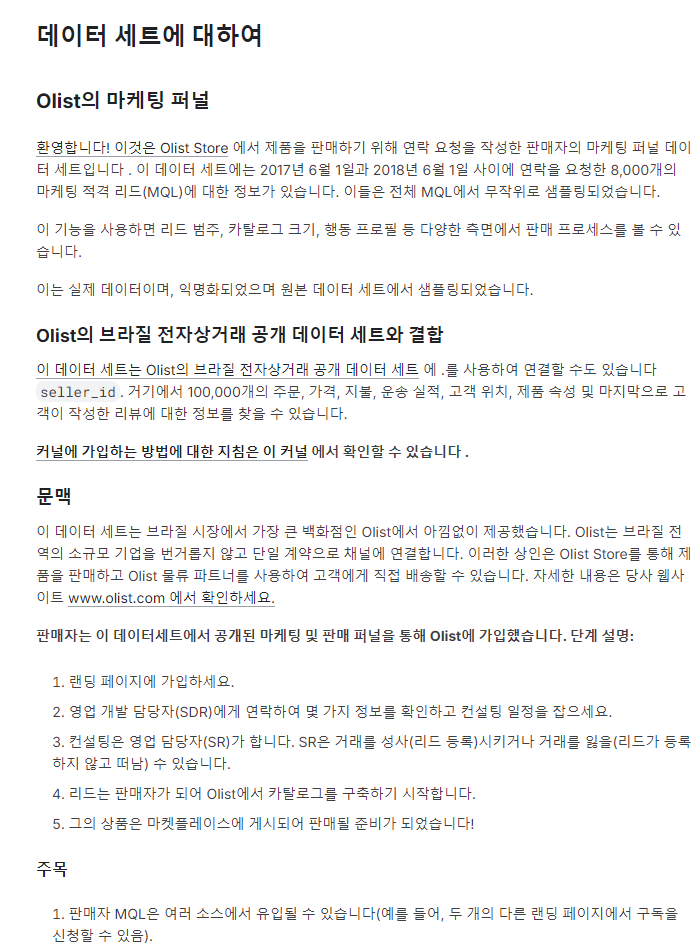


### 데이터를 자세히 들여다 보기전에 B2B 퍼널 데이터 관점에서 제시할 수 있는 전략은?
  - **OLIST 입장에선 잠재 고객이 구독을 많이 해야 한다!**
   - 1. 잠재 고객을 기존 보다 더 많이 유입시키자!
   - 2. 유입된 잠재 고객의 판매자로의 전환율을 높이자!
---
**시계열성을 고려해서 볼 수 있는 것은?**

- 데이터는 잠재 고객의 첫 접속 날짜를 알 수 있다.
- 잠재 고객이 판매자로 변환되는 날짜를 알 수 있다.
  - 즉, **잠재 고객 별 전환되는데 걸리는 시간을 알 수 있다.**
  - 고객 별 걸리는 시간을 가지고 연계해서 볼 수 있는 것은?
   - 해당 고객을 맡은 **영업 담당자의 능력을 유추**해볼 수 있다(거래 성사 시간).
   - 어떤 **유입 채널이 효과적**인지 전환 시간을 보고 생각은 해볼 수 있다.
   - 전환 시간 길이에 따른, **잠재 고객의 특성** (프로필, 리드 유형, 사업 부문 등)을 파악해 볼 수 있다.

---
- **OLIST 상담을 위한 `오리진`과 `랜딩 페이지`에 대한 이해**
  - 오리진: 리드가 처음으로 Olist와 상호작용하게 된 경로 또는 매체
  - 랜딩 페이지: 리드가 처음으로 방문한 Olist의 웹페이지
    - 데이터 설명에도 나와 있듯이, 가입은 여러 페이지에서 할 수 있다.

- 랜딩 페이지와 유입 채널의 성과에 대해 알아 볼 수 있다.
  - 여기서 말하는 성과란?
  - 크게 **1) 유입에 기여한 성과**와 **2) 전환에 대한 성과**로 나눠 볼 수 있다.
    - 가설) **매체의 경우 매체 자체의 광고 효과에 따라 유입 효과가 다를 것이다.**
      - 광고 자체에 대한 측정은 없어도, 단순 유입이 어디가 더 많이 했는지는 알 수 있다.
    - 가설) **특정 매체를 통해 유입된 잠재 고객의 전환율이 높을 것이다.**
      - 광고를 보고 본인이 기대했던 내용이, 영업담당자와의 컨설팅과 일치한다면 전환할 가능성이 높을 것이다. 매체마다 광고 내용의 길이, 디테일, 시각적 효과가 다르기 때문이고, 매체를 보고 기대했던 내용은 컨설팅 내용과 일치해야 일반적으로 계약을 하기 때문이다.
    - 가설) **특정 렌딩 페이지를 통과하고, 컨설팅을 고려한 사람이 많을 것이다.**
      - 가입 페이지의 경우, 데이터 제공자가 여러 곳이 있을 수 있다고 언급하였다. 즉 UI/UX 효과에 따른 렌딩 페이지에서 가입을 하거나, 망설이는 잠재 고객이 있을 수 있다. 보기 간편하고, 인증이 수월하고, '좋은 느낌'이면 일단 상담 전 가입까지는 완료할 가능성이 높다.
    - 가설) **특정 렌딩 페이지가 판매자 전환을 더 촉진할 것이다.**
      - 일반적으로 매체 광고 링크를 눌렀을 때, 도달하는 가입 페이지가 다 다를 수 있다. 이는 채널 별 렌딩 페이지 집계로 확인 가능한 부분이며, 판매자 전환을 높이는 방법을 랜딩 페이지, 매체 입장에서 고려해볼 때, 적절한 연결이 중요할 수 있다. 즉 전환율이 높았던 렌딩 페이지 위주로 매체 광고를 눌렀을 때 이동하도록 설정해야 할 수 있다.

---
- **SDR과 SR**에 대한 이해
  - 데이터 제공자는 SDR이 랜딩 페이지 가입 후 SR과의 컨설팅 날짜를 잡는 역할을 하는 것을 명시하였다.
  - SR은 실제로 잠재 고객과 상담을 하는 사람이다. 즉, SR의 역량에 따른 거래 성사와 거래 실패가 결과로 나타난다.
  - 그렇다면 성과를 볼 때 누구를 위주로 볼 것인가?
    - 데이터 설명으로 미루어 보아,**SR의 성과를 보는 것이 우선적**이라고 생각된다.
    - 다만 **SDR의 대한 역할을 무시할 순 없다**. 내가 판매자라고 생각했을 때, 떨리는(?) 마음으로 능동적인 첫 전화에 대한 나의 궁금증을 해소하고, 안도감을 주어 성공적으로 첫 미팅 일자를 잡았다면, SDR은 자신의 역할을 충분히 수행했기 때문이다.
    - 즉, 전환에 대한 전략 제시 단계에 있어, 우수 SDR/SR을 판별하고, 이들의 특성을 파악하고, 더 전문화를 할 수 있다고 생각된다. 우수 인원을 교육 담당자로 배치하여, 우수 인원의 역량과 노하우 공유가 가능하기 때문이다.
    - 그렇다면 우리가 알 수 있는 우수 인원의 특성은 무엇일까?
      - 이들이 담당했던 잠재고객의 특성을 기반으로도 유추할 수도 있다.
      - SR A씨가 상당히 성공적으로 계약 성사를 시켰고, 계약이 성사된 잠재 고객의 특성을 보았더니, 대부분의 고객이 `lead_type`이 `offline`이고, 사업 부문이 `computer` 였다면, 영업 담당자는 오프라인 판매 및 컴퓨터 관련 지식을 보유한 인원일 가능성이 있다. 즉 영업 담당자의 역량을 파악해 적절하게 배치를 하는 내부적인 전략을 제시할 수 있을 것이다.
      - SR은 또한 특정 lead_behaviour_profile를 가진 사람에 대해 조금 더 친화적인 면모를 지닐 수 있다. 성격이 shark이거나, cat인 잠재 고객에 대한 이해가 높을 수 있다.
  
---
- **lead_behaviour_profile**에 대한 이해
  - 데이터 제공자는 해당 프로파일이 DISC 성격 검사에 기인하다는 것을 명시하였다.
  - 이 검사의 시기는 SDR이 접촉 시 식별, 성격 검사에 따른 판매자의 특징에 대해 알아 볼 수 있을 것이다.
  - 가설) 성격이 특정 동물인 사람은, 매출이 높거나, 사업부문이 전문적이거나 단편적이거나, 온라인 사업 위주이거나, 회사를 보유하거나, 글로벌 인기 상품을 가질 가능성이 있다.
   - 이 사람에 대해서는 PUBLIC DATA와 연계해서 더 많은 특성을 볼 수 있을 것(추가 고려 필요)
  - 가설) 특정 성격의 판매자가 OLIST STORE에 많이 유입되었을 것이다.
    - 성격이 기입된 판매자에 한해서, 이들이 잠재 고객 시절 어떤 채널과 렌딩 페이지를 선호했는지 역순으로 추적한다면, 파악이 가능할 것이다. 신중한 성격의 사람과 진취적인 성격의 사람이 특정 광고나, 가입 페이지에서 제공하는 정보를 수용하는 능력과, 정보에 대한 만족도는 다를 것이다. 즉 특정 성격의 사람이 많이 전환되었다면, 이런 성격을 가진 사람을 더 유입시킬 수 있도록 랜딩 페이지, 채널 등에 대한 대대적인 조정 전략을 펼칠 수 있을 것이다.


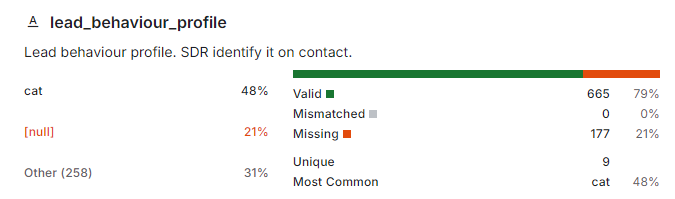

- 특정 컬럼에 대한 정보
 - `declared_monthly_revenue`: Lead declared estimated monthly revenue. Informed on contact.리드가 Olist와 처음 연락했을 때 제공한 정보

### kaggle discussion에서 나온 질의응답
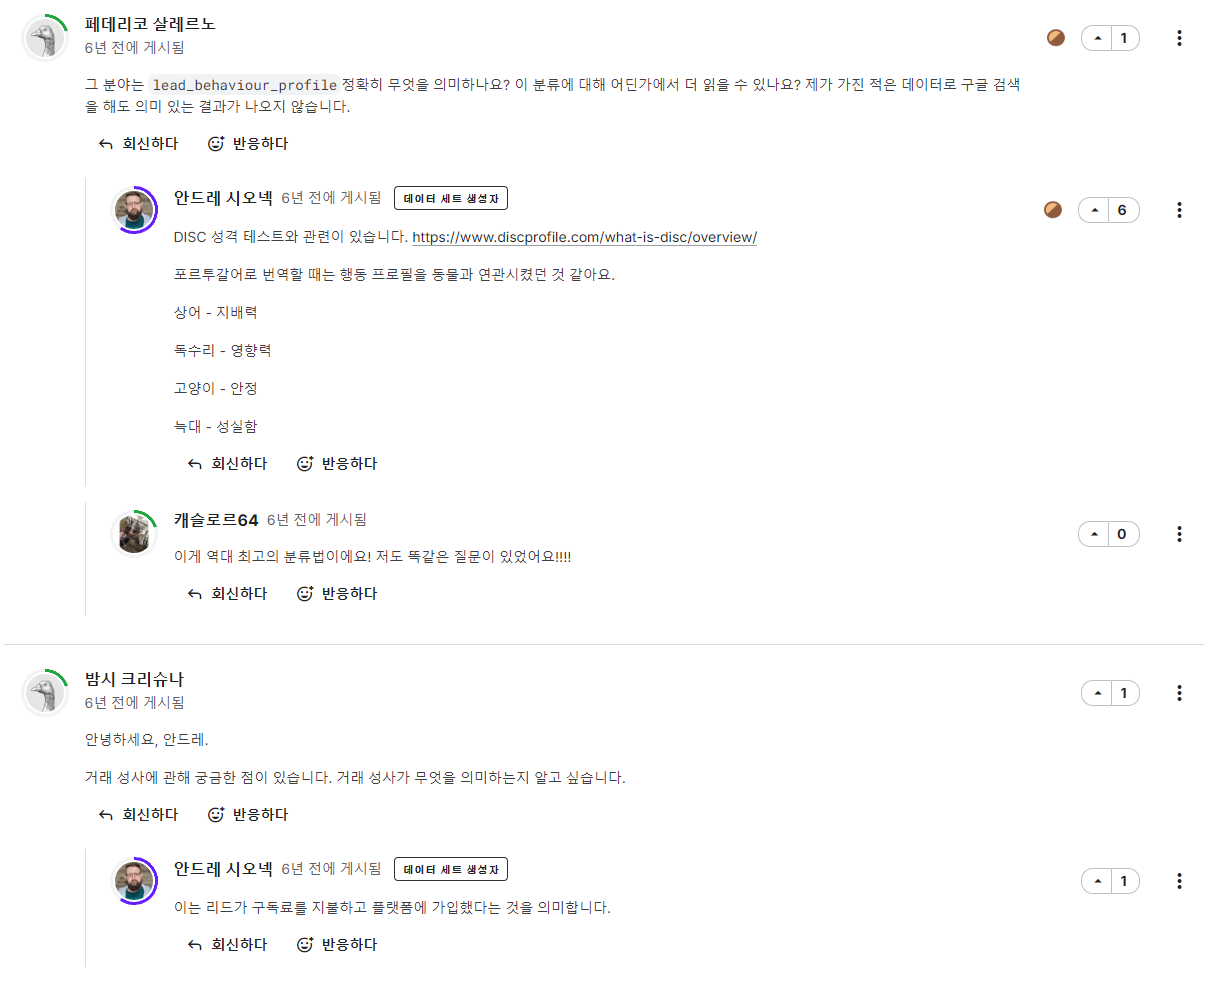

###  MQL EDA

In [ ]:
display(df_mql.info(),df_mql.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


None

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [ ]:
df_mql['mql_id'].nunique() # 8000명의 고유 lead

8000

#### 1.1 전처리

In [ ]:
print(df_mql['origin'].isnull().sum()) # 60명 lead에 대한 유입 origin 정보가 없음 -> 'unknown'대체
df_mql['origin'].fillna('unknown',inplace=True)

60


In [ ]:
df_mql['landing_page_id'].nunique() # 495개의 렌딩 페이지 아이디
# 495개의 웹페이지가 있다는 의미일까?
# 꼭 495개의 완전히 독립적인 웹페이지를 의미하는 것은 아닐 수 있다.
# 동일한 웹페이지 템플릿을 사용하지만 다른 URL 파라미터나 콘텐츠가 적용된 여러 페이지일 수도 있다.
# 확실한 것은, Olist에서 495개의 서로 다른 랜딩 페이지가 존재하거나, 최소한 그 정도의 다양한 마케팅 목적에 맞춰 설계된 페이지들이 있다는 것을 의미
# 각 랜딩 페이지는 특정 마케팅 캠페인이나 타겟 고객을 대상으로 설정되었을 가능성 있음

495

#### 1.2 orgin 분포 분석

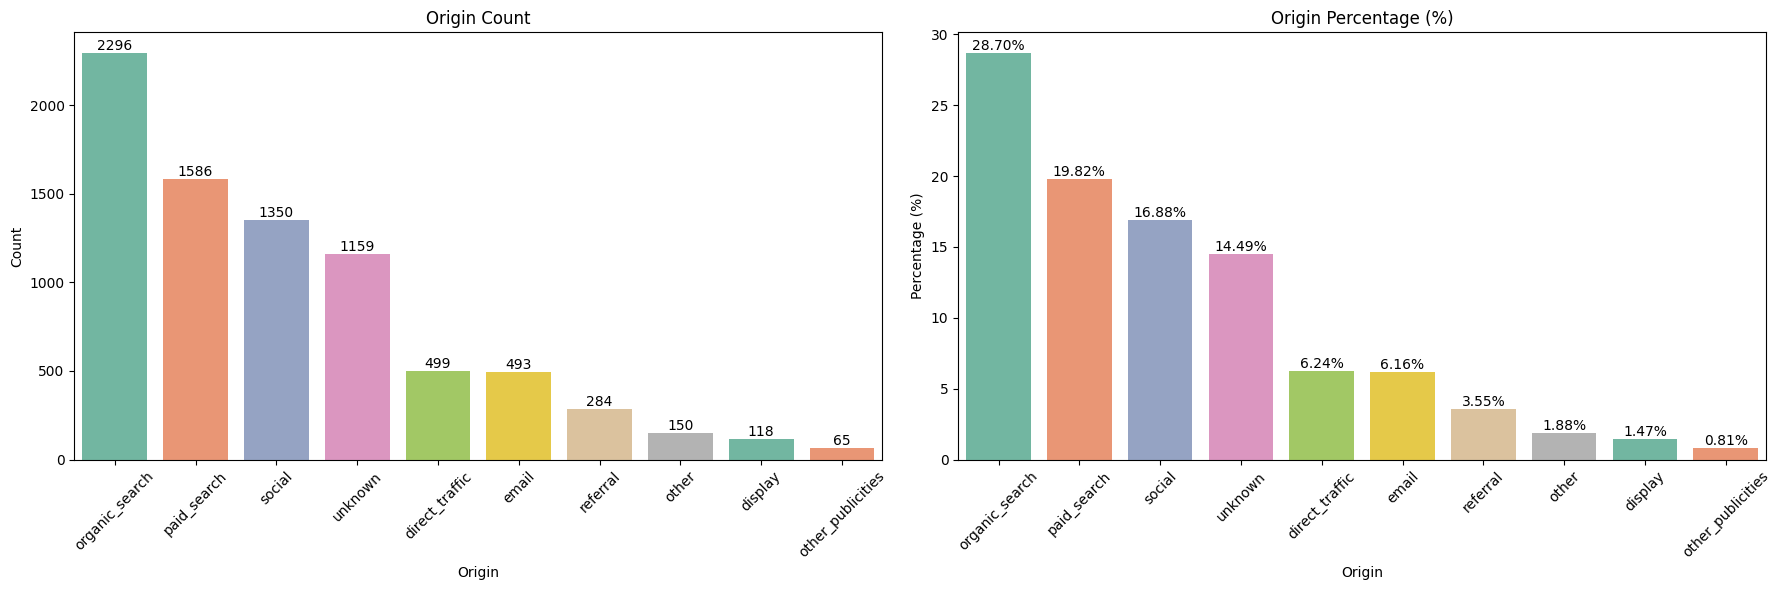

In [ ]:
origin=df_mql['origin'].value_counts().reset_index()
origin.columns=['origin','count']
origin = origin.sort_values('count', ascending=False)
origin['percentage'] = (origin['count'] / origin['count'].sum()) * 100

metrics = [('count', 'Count'), ('percentage', 'Percentage (%)')]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
for i, (metric, ylabel) in enumerate(metrics):
    sns.barplot(ax=axes[i], data=origin, x='origin', y=metric, palette='Set2')
    axes[i].set_xlabel('Origin')
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(f'Origin {ylabel}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    for j, v in enumerate(origin[metric]):
        if metric == 'percentage':
            axes[i].text(j, v, f'{v:.2f}%', ha='center', va='bottom')
        else:
            axes[i].text(j, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 28.7%의 lead가 검색 엔진(organic_search)을 통해 유입된다.사용자가 직접 검색한 경우로 가장 많은 비중 차지.
# 19.82%의 lead는 유료 검색(paid_search)에 의해 유입된다. google ads 같은 상하단에 표시되는 광고를 통해 유입.
# 16.88%의 lead SNS(social)로 유입된다. SNS 광고.
# 전체 중 14.49%의 unknown에 의해 유입됨. 트래픽 출처를 알 수 없는 것인데, 이 소스가 주로 어떤 채널의 랜딩 페이지 이동과 겹치는지, 판매자 전환이 되었는지 확인 필요.

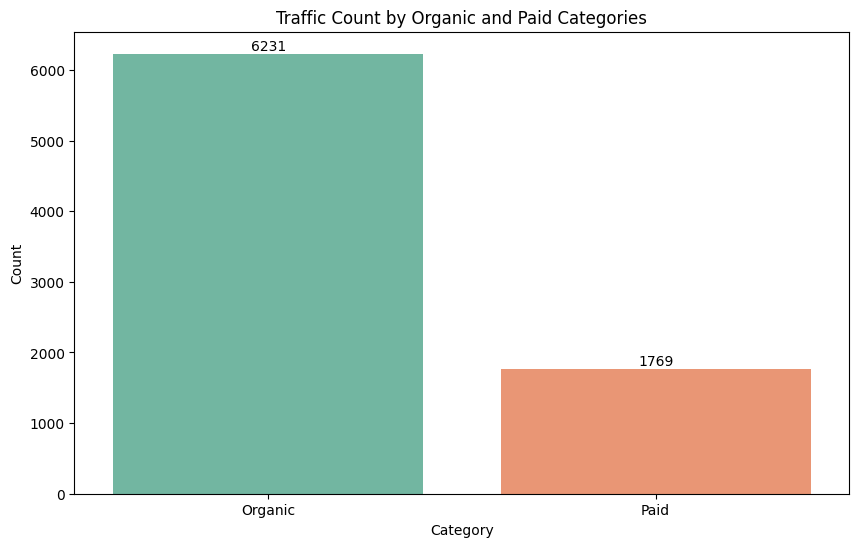

In [ ]:
# 참고자료: https://mixpanel.mfitlab.com/blog/why-and-how-analyze-marketing-channel
# 채널 대분류: Organic,Paid
# olist 자체 인스타그램,페이스 북 등 계정이 있어 social을 organic으로 가정

origin['category'] = origin['origin'].apply(
    lambda x: 'Paid' if x in ['paid_search', 'display', 'other_publicities'] else 'Organic'
)

grouped_data = origin.groupby('category')['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='category', y='count', palette='Set2')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Traffic Count by Organic and Paid Categories')
for i, v in enumerate(grouped_data['count']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# 전체 유입 채널 중 직접 검색에 의한 비율이 약 78%(6231)로 다음과 같은 시사점에 대해 고려:
## 브랜드 웹사이트나 인지도가 높은 편이다. 이미 웹사이트를 잘 알고 있을 가능성 높다
## 유료에 의한 유입이 적다는 것은, 제대로 온라인 마케팅 전략이 이루어지지 않은 가능성이 높다.-> 광고의 정보 전달력, 가시성 등 부족
## 보다 균형 잡힌 트래픽 소스가 확보되는 것이 중요해 보인다. -> 잠재 고객층이 넓어지기 때문이다.

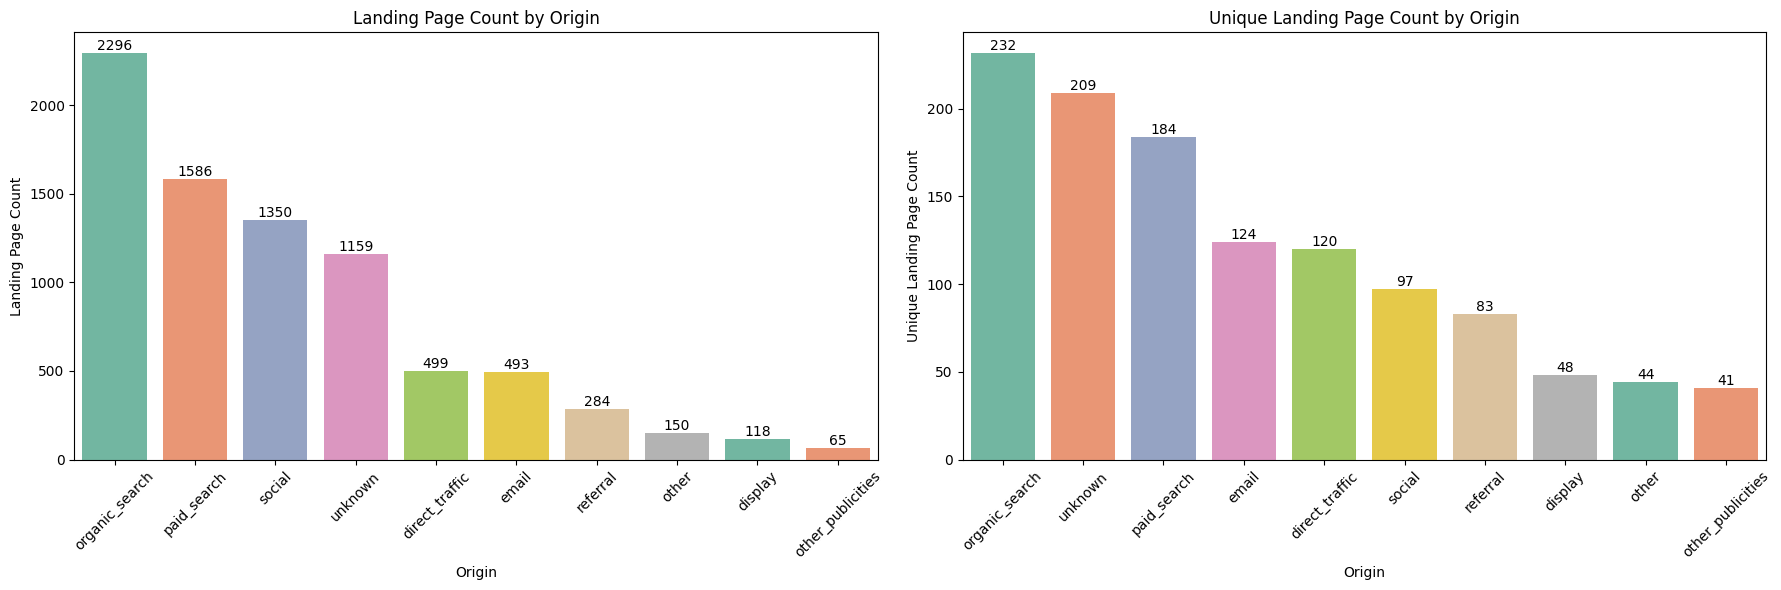

In [ ]:
# 채널 별 연결되는 렌딩 페이지 수 파악해보기
metrics = {
    'Landing Page Count': df_mql.groupby('origin')['landing_page_id'].count().sort_values(ascending=False),
    'Unique Landing Page Count': df_mql.groupby('origin')['landing_page_id'].nunique().sort_values(ascending=False)
}

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop through the metrics and corresponding axes
for i, (title, metric) in enumerate(metrics.items()):
    sns.barplot(data=metric.reset_index(), x='origin', y='landing_page_id', palette='Set2', ax=axes[i])
    axes[i].set_xlabel('Origin')
    axes[i].set_ylabel(title)
    axes[i].set_title(f'{title} by Origin')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    for j, v in enumerate(metric):
        axes[i].text(j, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Organic Search: 매우 다양한 랜딩 페이지로 트래픽이 유입되고 있음 -> SEO 전략이 잘 이루어졌을 가능성이 있다.
# SEO -> `Search Engine Optimization`: 구글과 같은 검색엔진에 친화적인 사이트를 구축하여 광고가 아닌 자연 검색 결과를 통해 트래픽의 양과 질을 극대화하는 작업
# 참고: https://seo.tbwakorea.com/blog/seo-guide-2022/

## 유기적 검색과 유료 검색은 매우 중요한 트래픽 소스이며, 다양한 랜딩 페이지로 트래픽을 유도

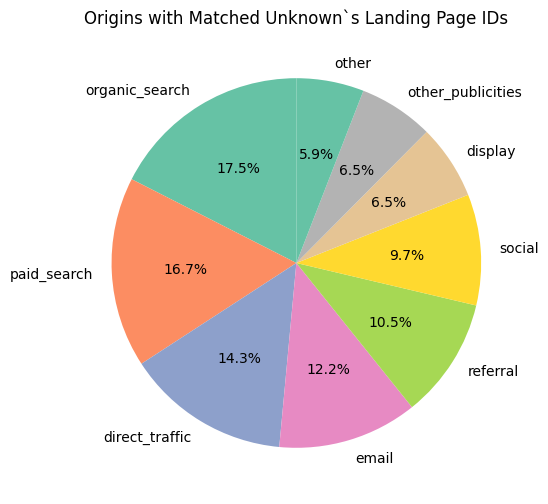

In [ ]:
# origin 별 렌딩 페이지 연결 수
landing_page_grouped=df_mql.groupby(['origin','landing_page_id']).size().reset_index()

# unknown의 렌딩 페이지 아이디는 다른 origin과 겹치는가? -> unknown의 정체 유추
unknown_landing_pages = landing_page_grouped[landing_page_grouped['origin'] == 'unknown']['landing_page_id']

matched_landing_pages = landing_page_grouped[landing_page_grouped['landing_page_id'].isin(unknown_landing_pages)]

matched_origins = matched_landing_pages[matched_landing_pages['origin'] != 'unknown'].groupby('origin').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(matched_origins, labels=matched_origins.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Origins with Matched Unknown`s Landing Page IDs')
plt.show()

# unkonown의 경우 렌딩 페이지 아이디가 다른 origin들과 겹치는 비율이 아래와 같다.
# unknown 트래픽의 출처를 추정하고 대체하려고 했으나, 분석의 정확성을 위해 대체는 하지 않는 것으로 진행.

In [ ]:
# df_mql['first_contact_date']=pd.to_datetime(df_mql['first_contact_date'])/
df_mql['first_contact_month']=pd.to_datetime(df_mql['first_contact_date']).dt.to_period('M')

#### 1.3 MQL 유입 분석

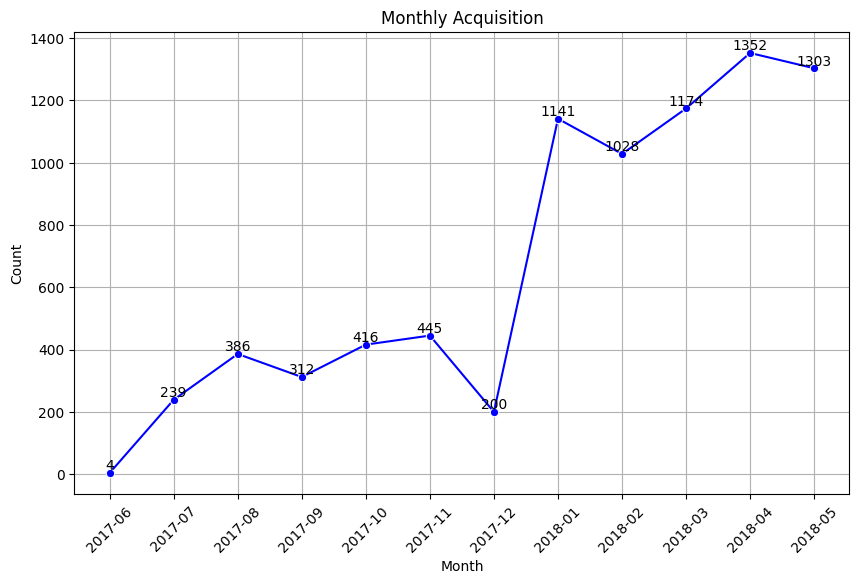

In [ ]:
monthly_acq=df_mql.groupby('first_contact_month').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_acq, x=monthly_acq['first_contact_month'].astype(str), y='count', marker='o', color='blue')
for i, v in enumerate(monthly_acq['count']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Acquisition')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 17년 대비 18년의 유입이 압도적이다.
# 17년 초기에는 매우 저조한 유입 성적을 보인다. 본격적으로 마케팅 실행되기 전 가능성
# 17년 12월에 성장 중 감소하다가, 18년 부터 급격히 유입이 증가하였다.
## 17년 하반기부터 마케팅 전략이 점차 효과를 보이며, 특히 2018년 초에는 매우 강력한 성장을 보인다.

In [ ]:
acq_origin=pd.pivot_table(df_mql,index='first_contact_month',columns='origin',values='mql_id',aggfunc='count').fillna(0).reset_index()
col=acq_origin.columns[1:]
acq_origin[col]=acq_origin[col].astype(int)
acq_origin

origin,first_contact_month,direct_traffic,display,email,organic_search,other,other_publicities,paid_search,referral,social,unknown
0,2017-06,0,1,1,0,0,0,0,0,0,2
1,2017-07,16,19,19,54,12,3,56,8,12,40
2,2017-08,22,2,24,122,3,2,79,16,45,71
3,2017-09,22,5,23,78,9,4,64,12,56,39
4,2017-10,23,5,30,125,8,11,100,8,52,54
5,2017-11,26,6,37,121,3,3,70,20,95,64
6,2017-12,10,5,12,60,1,1,35,9,39,28
7,2018-01,82,11,61,412,39,7,170,41,162,156
8,2018-02,65,18,68,291,16,5,212,34,156,163
9,2018-03,80,16,74,340,22,8,262,38,139,195


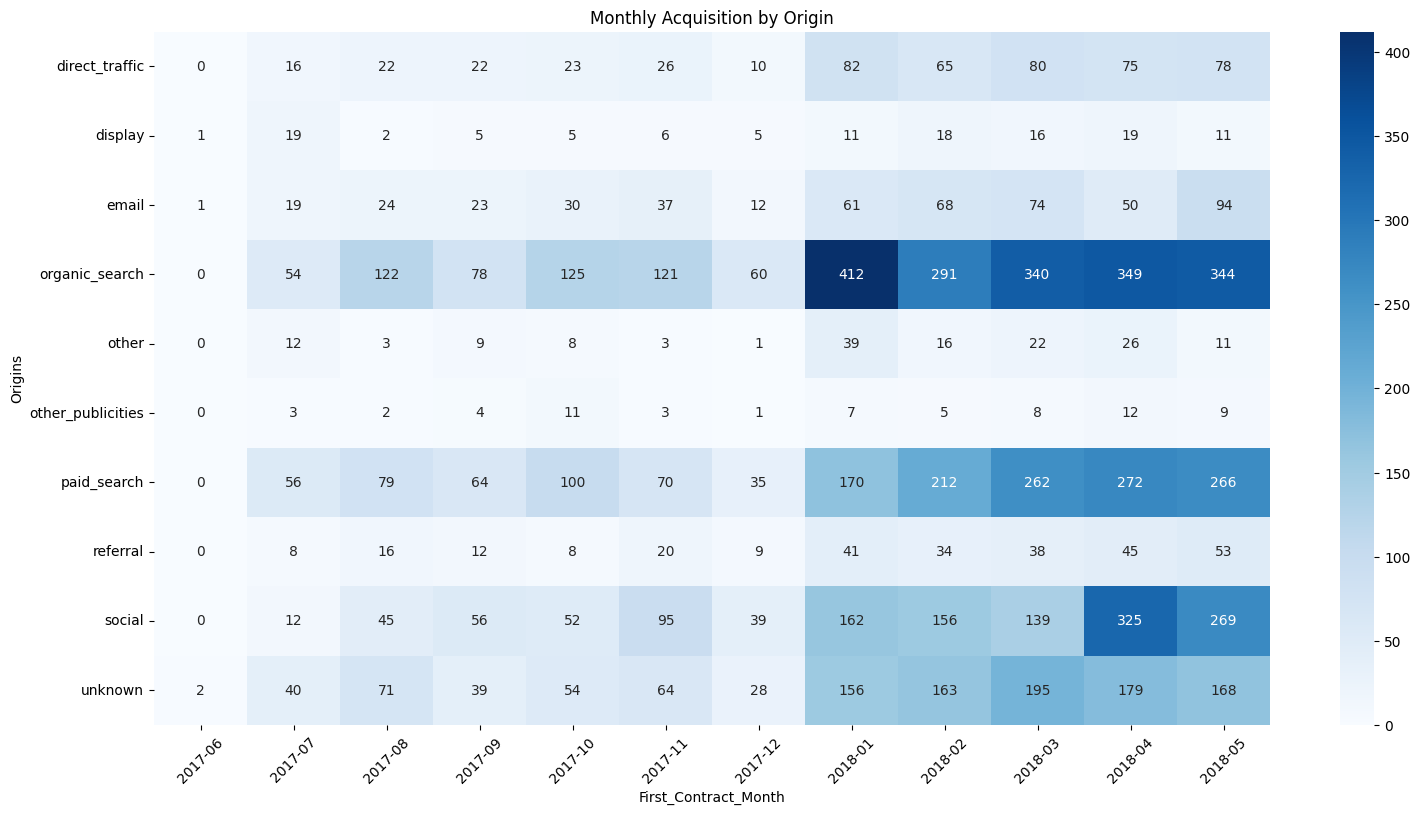

In [ ]:
plt.figure(figsize=(18, 9))
sns.heatmap(acq_origin.set_index('first_contact_month').T, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.xlabel('First_Contract_Month')
plt.ylabel('Origins')
plt.title('Monthly Acquisition by Origin')
plt.xticks(rotation=45)
plt.show()

# 전체적으로 모든 origin이 18년 유입이 증가
# organic search가 가장 유입이 많이되는 채널이며, 2018년부터 유입이 두드러진다. 1월에 가장 많이 유입됨
# paid search의 경우 18년 1월부터 4월까지 유입이 꾸준히 상승한다. 2번째로 유입이 많다.
# social은 18년 3월부터 4월의 유입 증가량이 139-> 325로 매우 높으며, 4,5월의 경우 paid search 보다 더 많이 유입에 기여하였다.


In [ ]:
# 가장 유입이 많이된 랜딩 페이지 TOP 10
top_10=df_mql['landing_page_id'].value_counts().head(10)
# 유입이 많은 렌딩 페이지의 origin 분포는?
top_10_origin=df_mql[df_mql['landing_page_id'].isin(top_10.index)]
temp=pd.pivot_table(top_10_origin,index='landing_page_id',columns='origin',values='mql_id',aggfunc='count').fillna(0)
temp=temp.astype(int).reset_index()
temp_sorted = temp.set_index('landing_page_id').loc[top_10.index]
temp_sorted

origin,direct_traffic,display,email,organic_search,other,other_publicities,paid_search,referral,social,unknown
landing_page_id,,,,,,,,,,
b76ef37428e6799c421989521c0e5077,25,3,3,116,2,4,81,8,13,657
22c29808c4f815213303f8933030604c,105,4,11,495,5,9,124,56,33,41
58326e62183c14b0c03085c33b9fdc44,5,0,0,9,1,2,2,5,464,7
88740e65d5d6b056e0cda098e1ea6313,3,1,1,7,2,4,4,3,413,7
ce1a65abd0973638f1c887a6efcfa82d,46,6,8,232,2,2,51,18,15,14
40dec9f3d5259a3d2dbcdab2114fae47,5,0,5,57,0,2,241,8,5,7
f017be4dbf86243af5c1ebed0cff36a2,20,3,4,197,0,3,19,23,26,15
e492ee5eaf1697716985cc6f33f9cd9b,22,4,35,109,16,4,40,24,19,18
a7982125ff7aa3b2054c6e44f9d28522,10,27,3,91,0,0,11,6,2,6


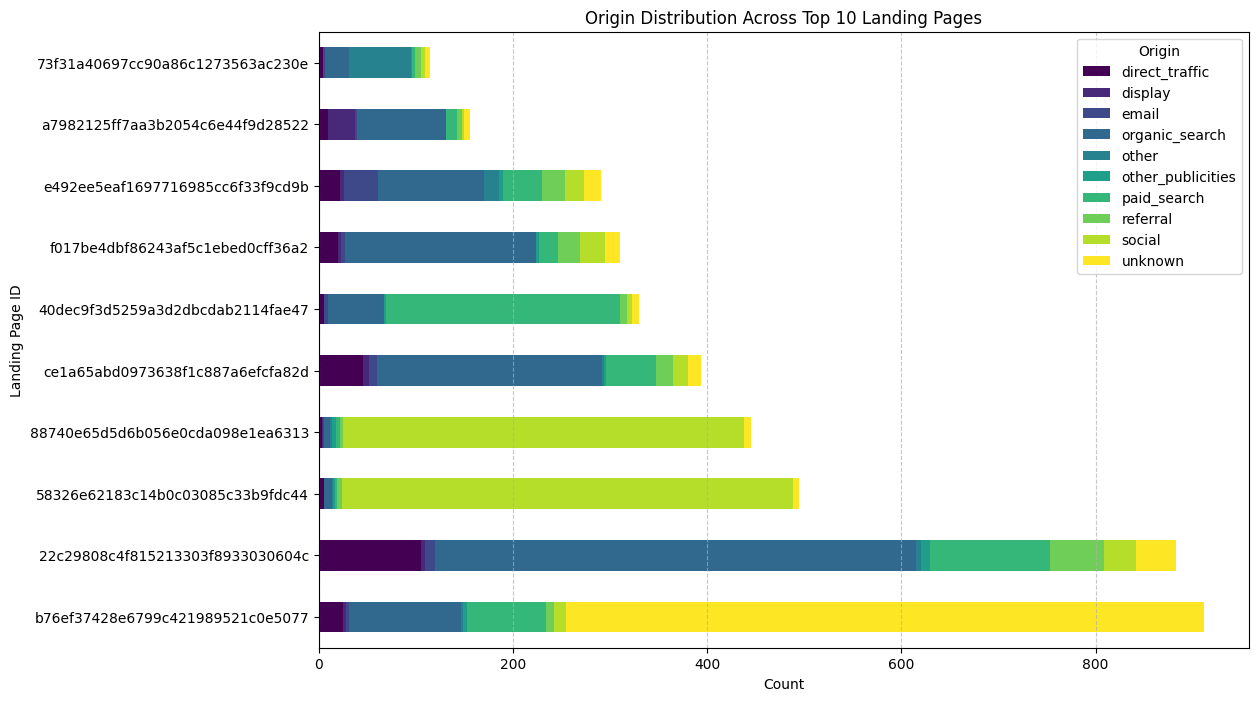

In [ ]:
temp_sorted.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')

plt.xlabel('Count')
plt.ylabel('Landing Page ID')
plt.title('Origin Distribution Across Top 10 Landing Pages')
plt.legend(title='Origin')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# b76ef37428e6799c421989521c0e5077: unknown이 많기 때문에, 해당 렌딩 페이지는 여러 경로에서 유입된 트래픽을 수용하는 범용적인 페이지일 가능성이 높다.
# 22c29808c4f815213303f8933030604: 해당 페이지는 organic search,paid_search 그리고 direct에서 높은 유입이 있다. SEO와 유료 광고의 혜택을 많이 받는다.
# 또한 referral, 추천에 의해서도 많이 방문된다.

## social 중심의 랜딩 페이지:
# 58326e62183c14b0c03085c33b9fdc44 & 88740e65d5d6b056e0cda098e1ea6313: 해당 페이지들은 소셜 미디어에 의해 압도적으로 많이 방문된다.

## paid 중심의 렌딩 페이지:
# 40dec9f3d5259a3d2dbcdab2114fae47


### Closed EDA

In [ ]:
display(df_closed.info(),df_closed.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

None

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [ ]:
display(df_closed['lead_behaviour_profile'].value_counts(),df_closed['lead_type'].value_counts(),df_closed['business_segment'].value_counts())

,count
lead_behaviour_profile,
cat,407
eagle,123
wolf,95
shark,24
"cat, wolf",8
"eagle, wolf",3
"eagle, cat",3
"shark, cat",1
"shark, wolf",1


,count
lead_type,
online_medium,332
online_big,126
industry,123
offline,104
online_small,77
online_beginner,57
online_top,14
other,3


,count
business_segment,
home_decor,105
health_beauty,93
car_accessories,77
household_utilities,71
construction_tools_house_garden,69
audio_video_electronics,64
computers,34
pet,30
food_supplement,28


#### 2.1 전처리 + 병합

In [ ]:
# has_company, has_gtin, average_stock, declared_product_catalog_size 컬럼은 삭제하고 진행
# 63~69의 유효 값을 가지기 때문에, 결측값이 90%를 넘어가 10%의 유효 데이터로 전환 판매자 파악을 어려울 것이라고 판단함
df_closed.drop(['has_company','has_gtin','average_stock','declared_product_catalog_size'],axis=1,inplace=True)

In [ ]:
# 거래 완료 날짜 날짜형 변환 + 월+ 일 컬럼 추가
df_closed['won_date']=pd.to_datetime(df_closed['won_date'])
df_closed['won_month']=df_closed['won_date'].dt.to_period('M')
df_closed['won_day']=df_closed['won_date'].dt.to_period('D')

In [ ]:
df_closed.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,won_month,won_day
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,2018-02,2018-02-26
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0,2018-05,2018-05-08
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,2018-06,2018-06-05
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,reseller,0.0,2018-01,2018-01-17
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,2018-07,2018-07-03


In [ ]:
df_closed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    842 non-null    object        
 1   seller_id                 842 non-null    object        
 2   sdr_id                    842 non-null    object        
 3   sr_id                     842 non-null    object        
 4   won_date                  842 non-null    datetime64[ns]
 5   business_segment          841 non-null    object        
 6   lead_type                 836 non-null    object        
 7   lead_behaviour_profile    665 non-null    object        
 8   business_type             832 non-null    object        
 9   declared_monthly_revenue  842 non-null    float64       
 10  won_month                 842 non-null    period[M]     
 11  won_day                   842 non-null    period[D]     
dtypes: datetime64[ns](1), 

In [ ]:
## 데이터 병합
df_merged=pd.merge(df_mql,df_closed,how='inner',on='mql_id')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    842 non-null    object        
 1   first_contact_date        842 non-null    object        
 2   landing_page_id           842 non-null    object        
 3   origin                    842 non-null    object        
 4   first_contact_month       842 non-null    period[M]     
 5   seller_id                 842 non-null    object        
 6   sdr_id                    842 non-null    object        
 7   sr_id                     842 non-null    object        
 8   won_date                  842 non-null    datetime64[ns]
 9   business_segment          841 non-null    object        
 10  lead_type                 836 non-null    object        
 11  lead_behaviour_profile    665 non-null    object        
 12  business_type         

In [ ]:
# 통합 데이터의 결측치는 전환된 판매자의 정보 중 누락된 정보들이다.
# no info로 결측치 변환
df_merged.fillna('no info',inplace=True)

In [ ]:
df_merged.isnull().sum().sum()

0

In [ ]:
monthly_cnv=df_merged.groupby('won_month').size().reset_index(name='count')
monthly_cnv

,won_month,count
0,2017-12,3
1,2018-01,73
2,2018-02,113
3,2018-03,147
4,2018-04,207
5,2018-05,122
6,2018-06,57
7,2018-07,37
8,2018-08,33
9,2018-09,23


#### 2.2 월별 유입 & 전환 성과 분석

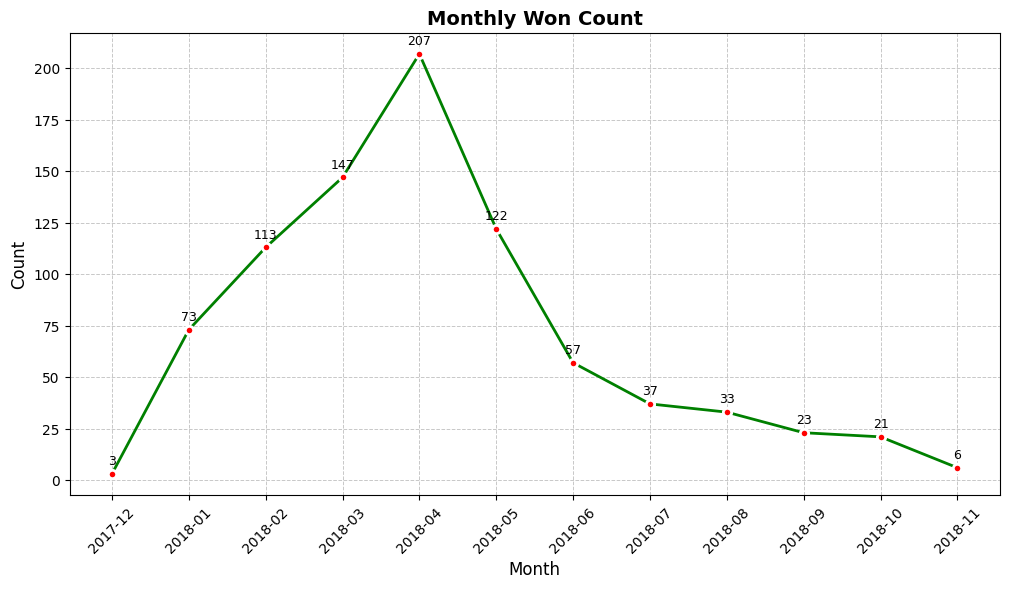

In [ ]:
# 1. 월별 최종 전환 건수 성과 측정

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_cnv, x=monthly_cnv['won_month'].astype(str), y='count',
             marker='o', color='green', linewidth=2, linestyle='-', markerfacecolor='red', markeredgewidth=2)


plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

for i, v in enumerate(monthly_cnv['count']):
    plt.text(i, v + 3, str(v), ha='center', va='bottom', fontsize=9, color='black')


plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Monthly Won Count', fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


# 2018년 1월부터 4월까지 판매자로 전환된 건수가 급격히 증가
# 해당 시기에 매우 효과적인 프로모션이 있을 가능성이 높다. 가입 시 혜택 등
# 2018년 5월 이후 감소 추세: 한번도 증가했던 추세 없이 지속적으로 감소, 특정 시즌의 영향 or 프로모션 효과 소진
# 초기에는 판매자 전환 활동이 매우 성공적이었으나, 후반기로 갈수록 그 효과가 감소한 것으로 보인다.
# 계약 성사를 위한 솔루션이 반드시 필요할 것

In [ ]:
# 월별 유입수, 전환 건수, 전환율 시각화
monthly_acq_cnv = pd.merge(monthly_acq, monthly_cnv, left_on='first_contact_month', right_on='won_month', how='outer')
monthly_acq_cnv

,first_contact_month,count_x,won_month,count_y
0,2017-06,4.0,NaT,NaN
1,2017-07,239.0,NaT,NaN
2,2017-08,386.0,NaT,NaN
3,2017-09,312.0,NaT,NaN
4,2017-10,416.0,NaT,NaN
5,2017-11,445.0,NaT,NaN
6,2017-12,200.0,2017-12,3.0
7,2018-01,1141.0,2018-01,73.0
8,2018-02,1028.0,2018-02,113.0
9,2018-03,1174.0,2018-03,147.0


In [ ]:
monthly_acq_cnv.fillna(0,inplace=True)
monthly_acq_cnv['conversion_rate']=round((monthly_acq_cnv['count_y']/monthly_acq_cnv['count_x']),2)
# inf 값 0으로 변경
monthly_acq_cnv.replace([np.inf, -np.inf], 0, inplace=True)
monthly_acq_cnv[['count_x','count_y']]=monthly_acq_cnv[['count_x','count_y']].astype(int)
monthly_acq_cnv['month'] = monthly_acq_cnv.apply(
    lambda x: x['first_contact_month'] if x['first_contact_month'] != 0 else x['won_month'], axis=1
).astype(str)

monthly_acq_cnv

,first_contact_month,count_x,won_month,count_y,conversion_rate,month
0,2017-06,4,0,0,0.00,2017-06
1,2017-07,239,0,0,0.00,2017-07
2,2017-08,386,0,0,0.00,2017-08
3,2017-09,312,0,0,0.00,2017-09
4,2017-10,416,0,0,0.00,2017-10
5,2017-11,445,0,0,0.00,2017-11
6,2017-12,200,2017-12,3,0.02,2017-12
7,2018-01,1141,2018-01,73,0.06,2018-01
8,2018-02,1028,2018-02,113,0.11,2018-02
9,2018-03,1174,2018-03,147,0.13,2018-03


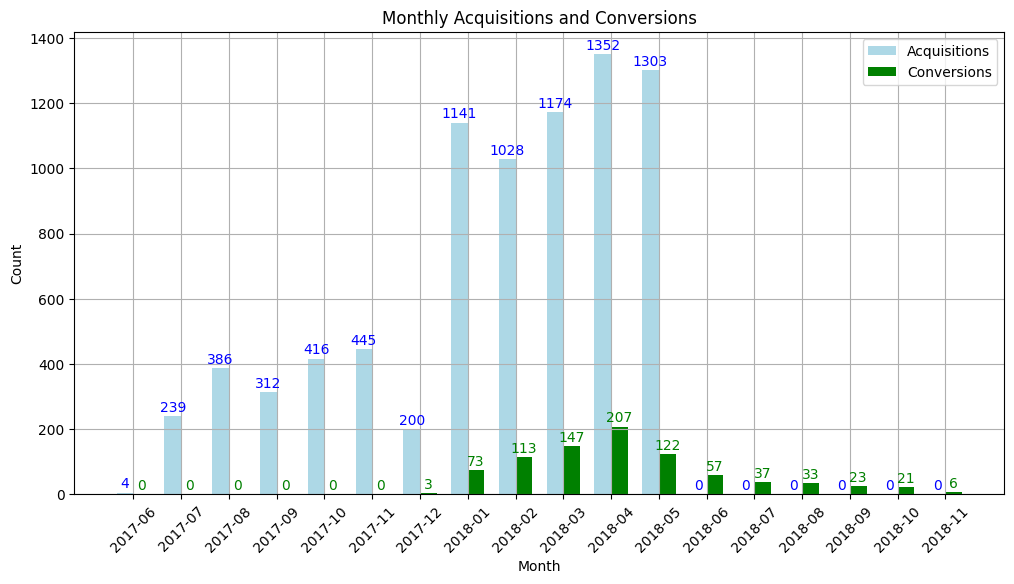

In [ ]:
# 종합

plt.figure(figsize=(12, 6))

ind = np.arange(len(monthly_acq_cnv))
width = 0.35
p1 = plt.bar(ind - width/2, monthly_acq_cnv['count_x'], width, label='Acquisitions', color='lightblue')
p2 = plt.bar(ind + width/2, monthly_acq_cnv['count_y'], width, label='Conversions', color='green')

for rect in p1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height + 5, '%d' % int(height), ha='center', va='bottom', color='blue')
for rect in p2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height + 5, '%d' % int(height), ha='center', va='bottom', color='green')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Acquisitions and Conversions')
plt.xticks(ind, monthly_acq_cnv['month'], rotation=45)

plt.legend()

plt.grid(True)
plt.show()

##### 2.2.1 특정 월에 유입된 lead에 전환

In [ ]:
# 특정 월에 유입된 인원의 전환율
temp=df_merged.groupby('first_contact_month').size().reset_index(name='count')
temp=temp.merge(monthly_acq,on='first_contact_month',how='left')
temp['conversion_rate']=temp['count_x']/temp['count_y']
temp

,first_contact_month,count_x,count_y,conversion_rate
0,2017-07,2,239,0.008368
1,2017-08,9,386,0.023316
2,2017-09,7,312,0.022436
3,2017-10,14,416,0.033654
4,2017-11,18,445,0.040449
5,2017-12,11,200,0.055000
6,2018-01,152,1141,0.133216
7,2018-02,149,1028,0.144942
8,2018-03,167,1174,0.142249
9,2018-04,183,1352,0.135355


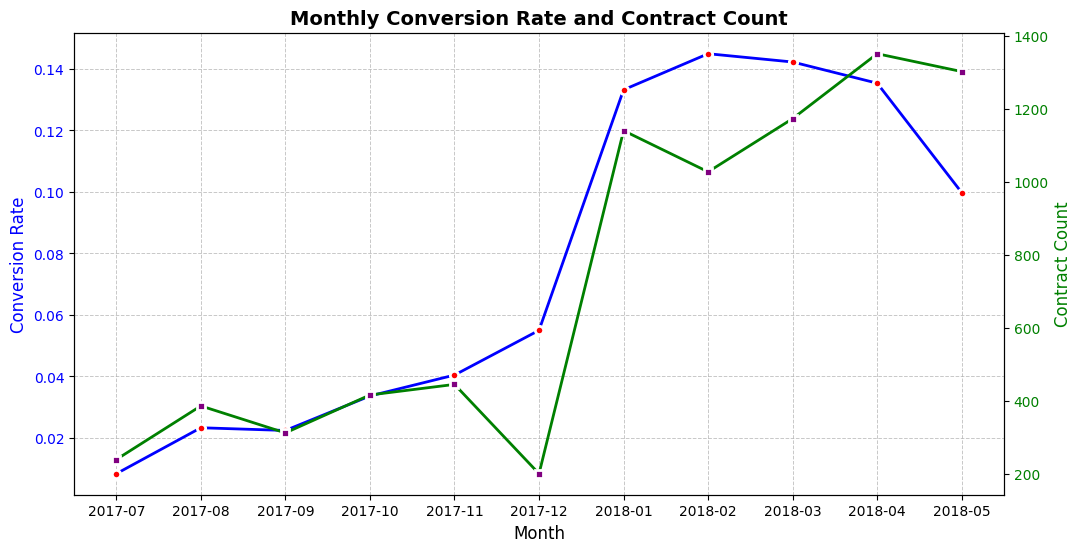

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis: conversion_rate
sns.lineplot(data=temp, x=temp['first_contact_month'].astype(str), y='conversion_rate',
             marker='o', color='blue', linewidth=2, linestyle='-', markerfacecolor='red', markeredgewidth=2, ax=ax1)

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Conversion Rate', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Monthly Conversion Rate and Contract Count', fontsize=14, weight='bold')
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)


ax2 = ax1.twinx()
sns.lineplot(data=temp, x=temp['first_contact_month'].astype(str), y='count_y',
             marker='s', color='green', linewidth=2, linestyle='-', markerfacecolor='purple', markeredgewidth=2, ax=ax2)

ax2.set_ylabel('Contract Count', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


# 2017년 하반기부터 2018년 초에 유입된 lead의 전환율이 점진적으로 증가
# 2018년 1월부터 4월까지는 특히 높은 전환율을 기록
# 18년 초부터 전환율이 높았던 이유는, 이 시기에 유입된 인원이 많은 것 역시 반영해야한다.
# 18년 2월부터 5월까지 유입이 있엇던 것에 비해 전환율은 떨어지고 있다. -> 해결해야할 문제

In [ ]:
# 월별 유입된 mql 대비 판매자 전환율
# 전환되지 않은 mql 정보도 반영하기 위해 left merge
df_merged2=df_mql.merge(df_closed,on='mql_id',how='left')
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    8000 non-null   object        
 1   first_contact_date        8000 non-null   object        
 2   landing_page_id           8000 non-null   object        
 3   origin                    8000 non-null   object        
 4   first_contact_month       8000 non-null   period[M]     
 5   seller_id                 842 non-null    object        
 6   sdr_id                    842 non-null    object        
 7   sr_id                     842 non-null    object        
 8   won_date                  842 non-null    datetime64[ns]
 9   business_segment          841 non-null    object        
 10  lead_type                 836 non-null    object        
 11  lead_behaviour_profile    665 non-null    object        
 12  business_type       

#### 2.3 origin 별 유입 인원, 전환 인원, 전환율 분석

In [ ]:
## origin 별 유입 인원, 전환 인원, 전환율
a=df_merged2.groupby('origin')
a=a.agg({'mql_id':'count','seller_id':'count'}).reset_index()
a['conversion_rate']=np.round(a['seller_id']/a['mql_id'],3)
a=a.sort_values('conversion_rate',ascending=False)
a

,origin,mql_id,seller_id,conversion_rate
9,unknown,1159,193,0.167
6,paid_search,1586,195,0.123
3,organic_search,2296,271,0.118
0,direct_traffic,499,56,0.112
7,referral,284,24,0.085
8,social,1350,75,0.056
1,display,118,6,0.051
5,other_publicities,65,3,0.046
2,email,493,15,0.030
4,other,150,4,0.027


In [ ]:
df_merged2['origin']=='referral'
df_merged2[df_merged2['origin']=='referral']['seller_id'].isna().sum()

260

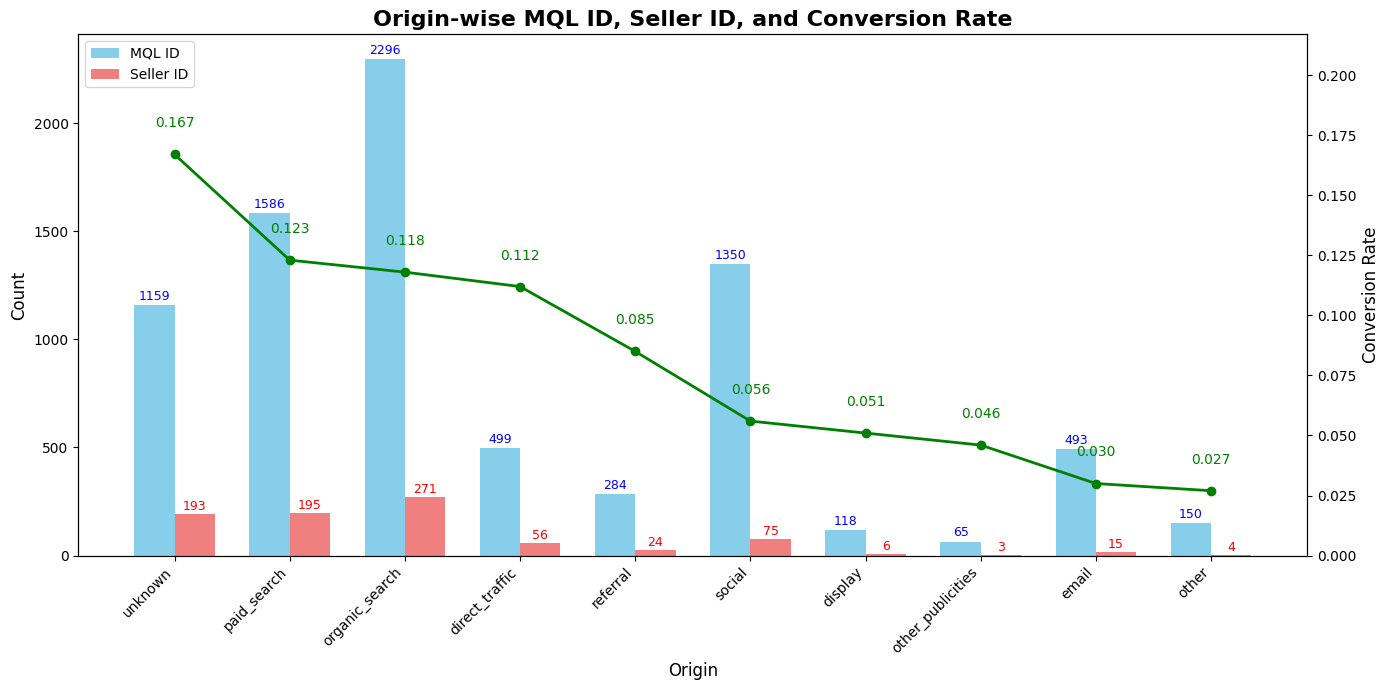

In [ ]:
x = np.arange(len(a['origin']))


fig, ax1 = plt.subplots(figsize=(14, 7))

bar_width = 0.35
bars1 = ax1.bar(x - bar_width/2, a['mql_id'], bar_width, label='MQL ID', color='skyblue')
bars2 = ax1.bar(x + bar_width/2, a['seller_id'], bar_width, label='Seller ID', color='lightcoral')


ax1.set_xlabel('Origin', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(a['origin'], rotation=45, ha='right', fontsize=10)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
line = ax2.plot(x, a['conversion_rate'], color='green', marker='o', linewidth=2, label='Conversion Rate')

ax2.set_ylabel('Conversion Rate', fontsize=12)
ax2.set_ylim(0, max(a['conversion_rate']) + 0.05)


for i, v in enumerate(a['conversion_rate']):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10, color='green')


for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=9, color='blue')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=9, color='red')


plt.title('Origin-wise MQL ID, Seller ID, and Conversion Rate', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()


# unknown의 전환율이 가장 높게 나왔으나, 이에 대한 해석은 일단 보류

# paid_search vs organic_search
## 검색 엔진과 유료 광고 모두 높은 전환율을 보여준다.
## 유료 광고의 경우 절대적인 유입 수도 2번째로 많지만, 가장 높은 전환율을 보여줘 꽤 효과적이라고 볼 수 있다.
## 검색 엔진의 경우 유입 수가 1위, 전환율은 유료 광고에 살짝 못미치지만 역시 효과적이다.

# 유입에 비해 전환이 저조한 채널은?
## scocial과 email은 전체 유입 수의 비율 중 도합 25%를 차지하지만, 전환율이 각각 0.056, 0.03으로 저조하다.
## 널이 리드를 효과적으로 전환하지 못하고 있음 -> 해당 채널의 전환 최적화 전략이 필요

##### 2.3.1 전환에 기여한 렌딩 페이지 분석

In [ ]:
# 전환에 기여한 랜딩 페이지 top 10
landing_cnv_10=df_merged['landing_page_id'].value_counts().reset_index().head(10)
landing_cnv_10.columns=['landing_page_id','count']

df_merged_10=df_merged[df_merged['landing_page_id'].isin(landing_cnv_10['landing_page_id'])]
b=pd.pivot_table(df_merged_10,index='landing_page_id',columns='origin',values='mql_id',aggfunc='count').fillna(0)
b=b.astype(int)

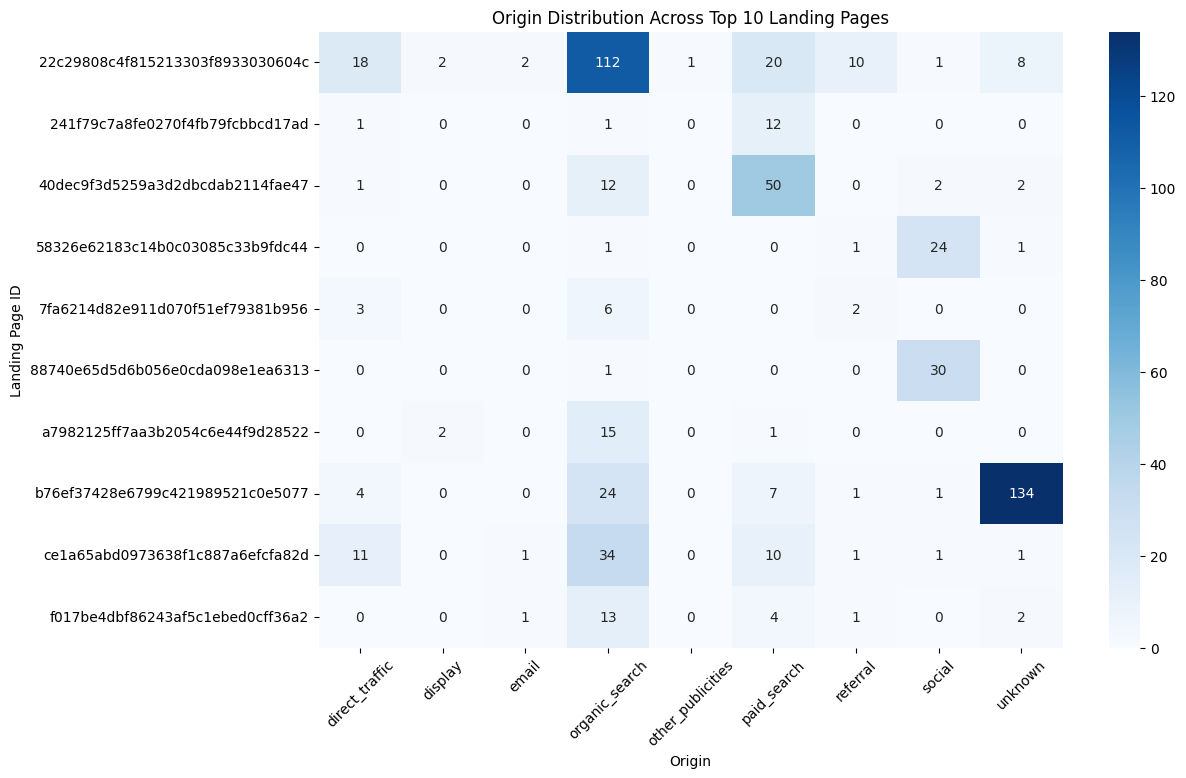

In [ ]:
# top 10의 origin 링크 출처1

plt.figure(figsize=(12, 8))
sns.heatmap(b, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.xlabel('Origin')
plt.ylabel('Landing Page ID')
plt.title('Origin Distribution Across Top 10 Landing Pages')
plt.xticks(rotation=45)
plt.show()

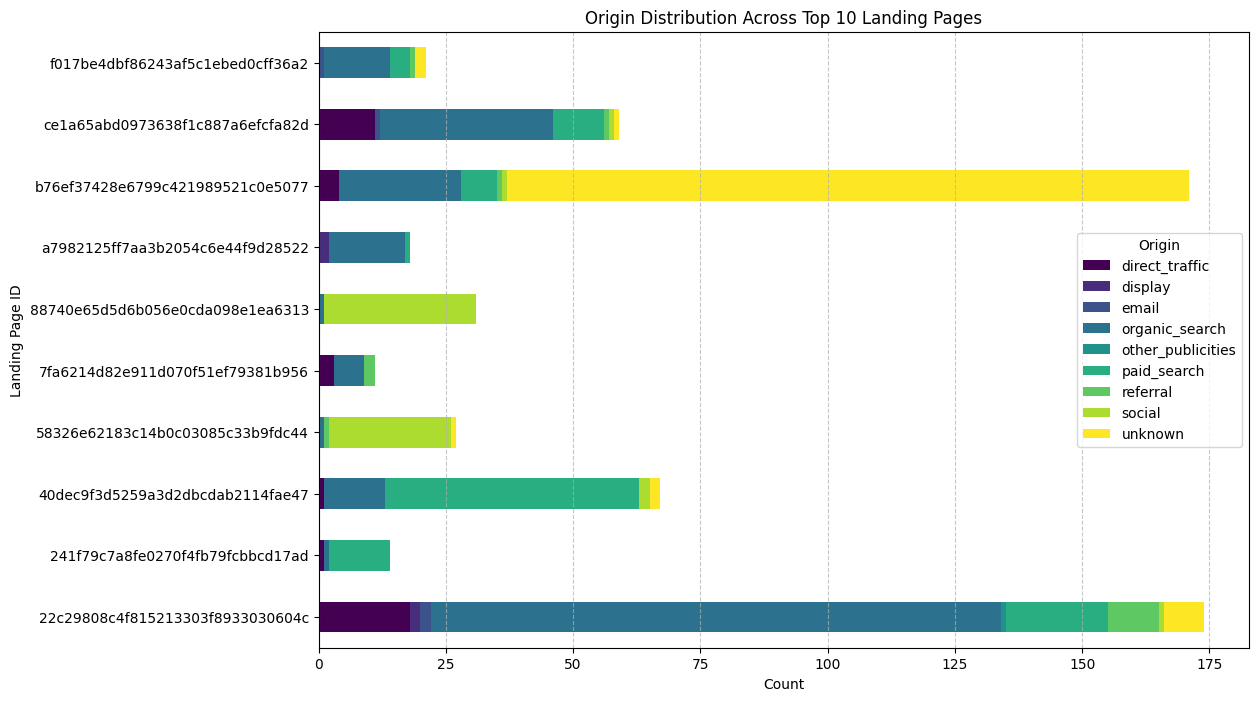

In [ ]:
# top 10의 origin 링크 출처2

b.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Landing Page ID')
plt.title('Origin Distribution Across Top 10 Landing Pages')
plt.legend(title='Origin')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### 2.4 전환 시간 분석

In [ ]:
df_merged['first_contact_date']=pd.to_datetime(df_merged['first_contact_date'])

In [ ]:
# 전환시간
df_merged['time_to_convert']=df_merged['won_date']-df_merged['first_contact_date']
df_merged['time_to_convert']=df_merged['time_to_convert'].dt.days
df_merged['time_to_convert'].describe(percentiles=[0.2,0.4,0.6,0.7,0.8])

# 전환 시간이 -2가 나오는 경우가 있다. -> 확인 필요(접촉이 성사보다 일반적으로 먼저 일어나기 때문)
# 전체 인원 중 절반이 2주이내, 70%가 약 5주 이내, 평균적으로 48일 이내 계약 체결

,time_to_convert
count,842.000000
mean,48.440618
std,75.328117
min,-2.000000
20%,4.000000
40%,10.000000
50%,14.000000
60%,22.000000
70%,38.000000
80%,78.600000


In [ ]:
df_merged[df_merged['time_to_convert']<0] # 한 건이 접촉 날짜보다 성사 날짜보다 앞선다.

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,won_month,won_day,time_to_convert
667,b91cf8812365f50ff4bda4bcd6206b05,2018-03-08,4aab772aeb9833c170d8ea5413e02eac,organic_search,2018-03,5e063e85d44b0f5c3e6ec3131103a57e,a8387c01a09e99ce014107505b92388c,495d4e95a8cf8bbf8b432b612a2aa328,2018-03-06 19:38:55,health_beauty,online_big,cat,reseller,0.0,2018-03,2018-03-06,-2


In [ ]:
record_to_fix = df_merged[df_merged['time_to_convert'] < 0]

df_merged.loc[record_to_fix.index, ['first_contact_date', 'won_date']] = df_merged.loc[record_to_fix.index, ['won_date', 'first_contact_date']].values
df_merged.loc[record_to_fix.index, ['first_contact_month', 'won_month']] = df_merged.loc[record_to_fix.index, ['won_month', 'first_contact_month']].values

df_merged['time_to_convert'] = df_merged['won_date'] - df_merged['first_contact_date']
df_merged['time_to_convert'] = df_merged['time_to_convert'].dt.days

df_merged[df_merged['time_to_convert'] < 0]

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,won_month,won_day,time_to_convert


In [ ]:
df_merged['time_to_convert'].describe(percentiles=[0.2,0.4,0.6,0.7,0.8]) # 정상화

,time_to_convert
count,842.000000
mean,48.444181
std,75.325800
min,0.000000
20%,4.000000
40%,10.000000
50%,14.000000
60%,22.000000
70%,38.000000
80%,78.600000


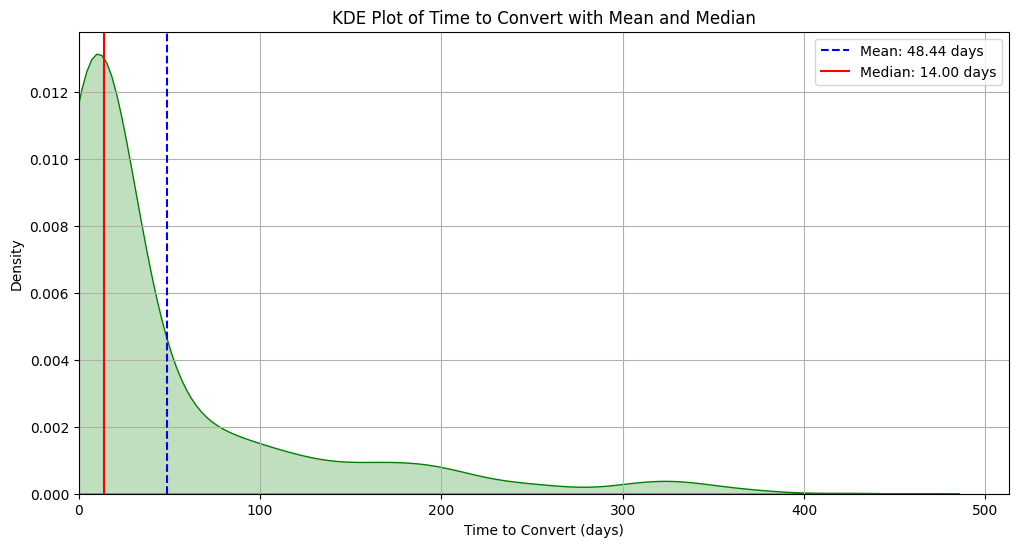

In [ ]:
# lead -> 판매자로의 전환까지 걸린 시간은?

mean_time_to_convert = df_merged['time_to_convert'].mean()
median_time_to_convert = df_merged['time_to_convert'].median()

plt.figure(figsize=(12, 6))
sns.kdeplot(df_merged['time_to_convert'], color='green', fill=True)

plt.axvline(mean_time_to_convert, color='blue', linestyle='--', label=f'Mean: {mean_time_to_convert:.2f} days')
plt.axvline(median_time_to_convert, color='red', linestyle='-', label=f'Median: {median_time_to_convert:.2f} days')

plt.xlabel('Time to Convert (days)')
plt.title('KDE Plot of Time to Convert with Mean and Median')
plt.xlim(0, None)
plt.grid(True)
plt.legend()
plt.show()

# 전체 인원 중 절반이 2주이내, 70%가 약 5주 이내, 평균적으로 48일 이내 계약 체결

##### 2.4.1 전환 시간 별 판매자 그룹화

In [ ]:
df_merged['time_to_convert']
#  중앙값(14일)과 평균값(48일)을 고려해서 5개 계약 시간 기반 그룹 라벨링 시도

,time_to_convert
0,5
1,34
2,63
3,3
4,267
...,...
837,126
838,132
839,12
840,30


In [ ]:
# 중앙값 및 평균값 고려하여 아래와 같이 임계점 설정, 중앙값 14, 평균 44

# 0-7일
# 8-14일
# 15-30일
# 31-60일
# 61일 이상
bins = [0, 7, 14, 30, 60, float('inf')]
labels = ['Expedited Deals', 'Quick Deals', 'Standard Deals', 'Prolonged Deals', 'Extended Negotiations']
# Create a new column with the group labels
df_merged['time_to_convert_group'] = pd.cut(df_merged['time_to_convert'], bins=bins, labels=labels, right=True)

In [ ]:
df_merged['time_to_convert_group'].value_counts()

,count
time_to_convert_group,
Expedited Deals,251
Extended Negotiations,195
Quick Deals,144
Standard Deals,127
Prolonged Deals,92


#### 2.5 SR 성과 분석

In [ ]:
emp=df_merged[['sdr_id','sr_id']].nunique()
emp
# sdr은 총 32명, sr은 총 22명이다.

,0
sdr_id,32
sr_id,22


In [ ]:
# SR의 전환 건수, SDR의 전환 건수

# sr_top_10=df_merged.groupby('sr_id').size().reset_index(name='count').sort_values('count',ascending=False)
sr_top_10_time=df_merged.groupby('sr_id').agg({'time_to_convert':'mean','seller_id':'count'}).reset_index().sort_values('seller_id',ascending=False).head(10)
sr_top_10_time.columns=['sr_id','mean_time_to_convert','count']
sr_top_10_time

,sr_id,mean_time_to_convert,count
7,4ef15afb4b2723d8f3d81e51ec7afefe,30.488722,133
19,d3d1e91a157ea7f90548eef82f1955e3,46.646341,82
9,6565aa9ce3178a5caf6171827af3a9ba,25.783784,74
11,85fc447d336637ba1df43e793199fbc8,33.703125,64
5,495d4e95a8cf8bbf8b432b612a2aa328,48.634921,63
21,fbf4aef3f6915dc0c3c97d6812522f6a,21.966102,59
3,2695de1affa7750089c0455f8ce27021,48.389831,59
20,de63de0d10a6012430098db33c679b0b,61.735849,53
13,9ae085775a198122c5586fa830ff7f2b,41.705882,51
18,c638112b43f1d1b86dcabb0da720c901,22.388889,36


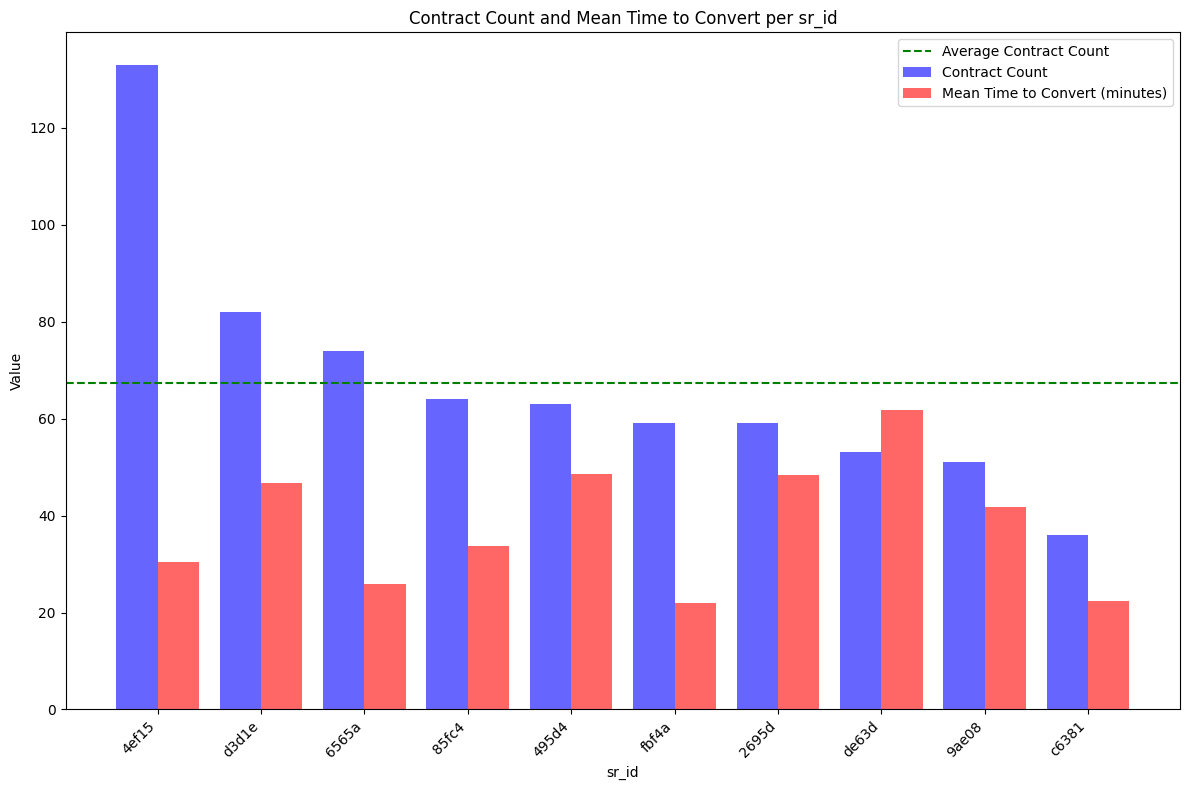

In [ ]:
#  SR 영업 담당자 실적

sr_top_10_time['short_sr_id'] = sr_top_10_time['sr_id'].str[:5]

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(sr_top_10_time['short_sr_id']))
width = 0.4
bars1 = ax.bar(x - width/2, sr_top_10_time['count'], width, label='Contract Count', color='b', alpha=0.6)
bars2 = ax.bar(x + width/2, sr_top_10_time['mean_time_to_convert'], width, label='Mean Time to Convert (minutes)', color='r', alpha=0.6)
mean_count = sr_top_10_time['count'].mean()
ax.axhline(mean_count, color='g', linestyle='--', label='Average Contract Count')
ax.set_xlabel('sr_id')
ax.set_xticks(x)
ax.set_xticklabels(sr_top_10_time['short_sr_id'], rotation=45, ha='right')
ax.set_title('Contract Count and Mean Time to Convert per sr_id')
ax.set_ylabel('Value')
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
sdr_top_10_time=df_merged.groupby('sdr_id').agg({'time_to_convert':'mean','seller_id':'count'}).reset_index().sort_values('seller_id',ascending=False).head(10)
sdr_top_10_time.columns=['sdr_id','mean_time_to_convert','count']
sdr_top_10_time

,sdr_id,mean_time_to_convert,count
13,4b339f9567d060bcea4f5136b9f5949e,33.585714,140
0,068066e24f0c643eb1d089c7dd20cd73,31.222222,81
14,56bf83c4bb35763a51c2baab501b4c67,27.135135,74
20,9d12ef1a7eca3ec58c545c678af7869c,45.500000,66
22,a8387c01a09e99ce014107505b92388c,25.593220,59
21,9e4d1098a3b0f5da39b0bc48f9876645,18.290909,55
26,de63de0d10a6012430098db33c679b0b,33.037736,53
11,370c9f455f93a9a96cbe9bea48e70033,50.784314,51
2,09285259593c61296eef10c734121d5b,36.666667,42
29,f42a2bd194f7802ab052a815c8de65b7,78.333333,42


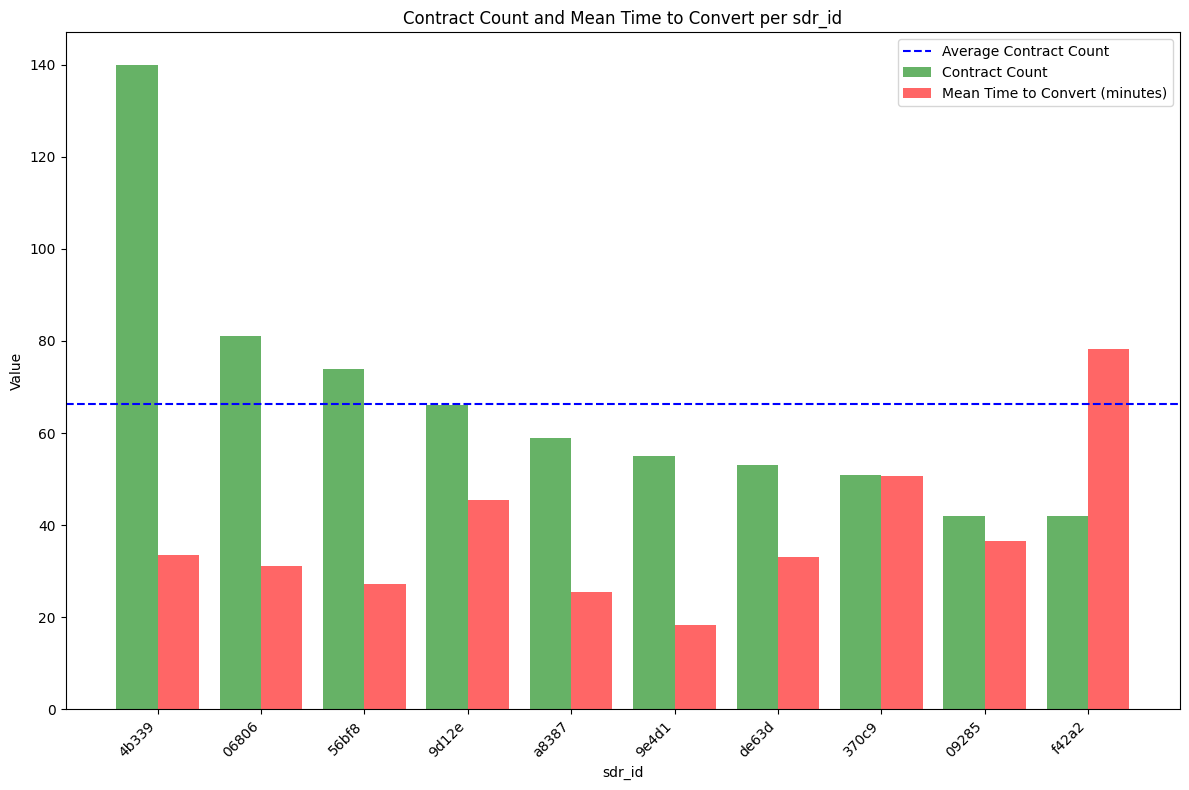

In [ ]:
#  SDR 실적

sdr_top_10_time['short_sdr_id'] = sdr_top_10_time['sdr_id'].str[:5]

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(sdr_top_10_time['short_sdr_id']))
width = 0.4
bars1 = ax.bar(x - width/2, sdr_top_10_time['count'], width, label='Contract Count', color='g', alpha=0.6)
bars2 = ax.bar(x + width/2, sdr_top_10_time['mean_time_to_convert'], width, label='Mean Time to Convert (minutes)', color='r', alpha=0.6)

mean_count = sdr_top_10_time['count'].mean()
ax.axhline(mean_count, color='b', linestyle='--', label='Average Contract Count')

ax.set_xlabel('sdr_id')
ax.set_xticks(x)
ax.set_xticklabels(sdr_top_10_time['short_sdr_id'], rotation=45, ha='right')
ax.set_title('Contract Count and Mean Time to Convert per sdr_id')
ax.set_ylabel('Value')
ax.legend()
fig.tight_layout()
plt.show()


In [ ]:
# 우수한 사원(계약을 많이 성사시킨)일수록 계약 시간이 짧을 것이다

sr_group= pd.merge(sr_top_10_time, df_merged[['sr_id', 'time_to_convert_group']], on='sr_id')
sr_group= sr_group.groupby(['sr_id', 'time_to_convert_group']).size().unstack(fill_value=0)
sr_group['total']=sr_group.sum(axis=1)
sr_group=sr_group.sort_values('total',ascending=False)
sr_group

time_to_convert_group,Expedited Deals,Quick Deals,Standard Deals,Prolonged Deals,Extended Negotiations,total
sr_id,,,,,,
4ef15afb4b2723d8f3d81e51ec7afefe,44,31,28,9,18,130
d3d1e91a157ea7f90548eef82f1955e3,29,13,6,13,16,77
6565aa9ce3178a5caf6171827af3a9ba,25,15,10,9,11,70
495d4e95a8cf8bbf8b432b612a2aa328,20,11,10,9,13,63
85fc447d336637ba1df43e793199fbc8,24,8,6,12,10,60
fbf4aef3f6915dc0c3c97d6812522f6a,26,8,15,3,5,57
2695de1affa7750089c0455f8ce27021,15,8,9,8,13,53
de63de0d10a6012430098db33c679b0b,16,9,8,3,17,53
9ae085775a198122c5586fa830ff7f2b,14,11,8,6,12,51


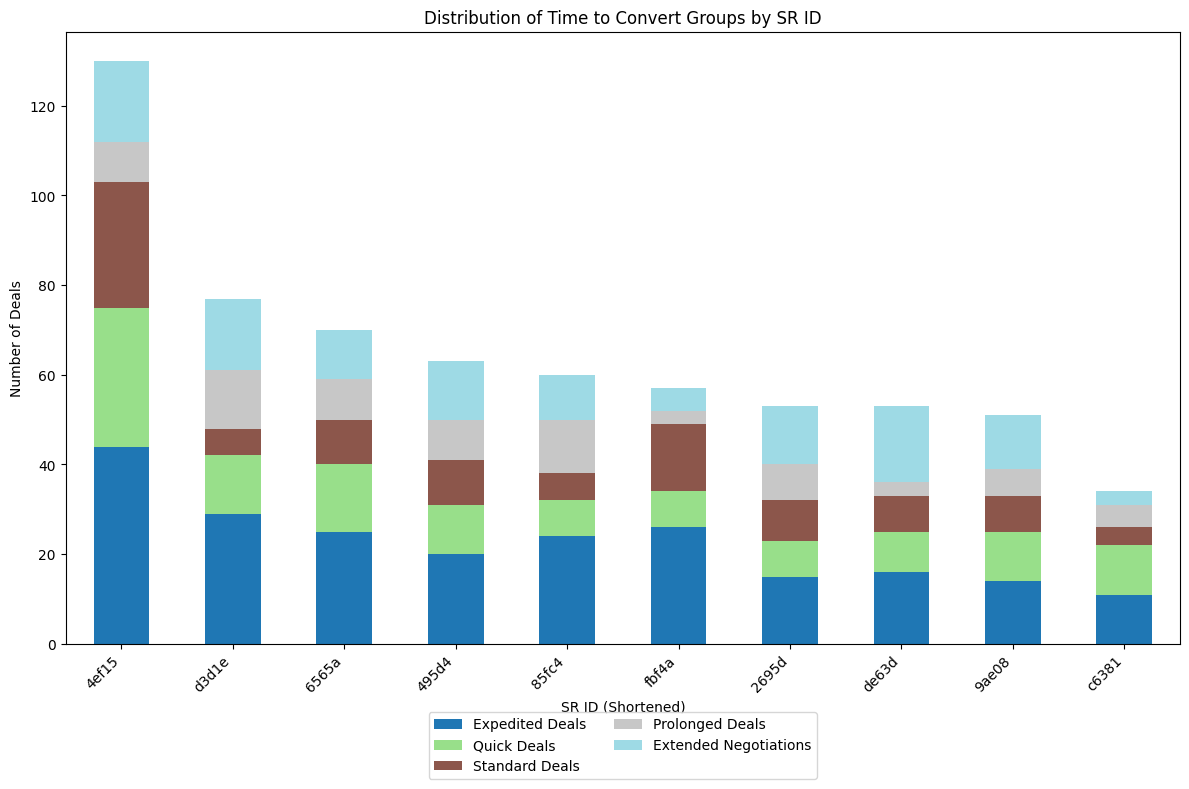

In [ ]:
sr_group.index = sr_group.index.str[:5]
fig, ax = plt.subplots(figsize=(12, 8))

sr_group[['Expedited Deals', 'Quick Deals', 'Standard Deals', 'Prolonged Deals', 'Extended Negotiations']].plot(
    kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_xlabel('SR ID (Shortened)')
ax.set_ylabel('Number of Deals')
ax.set_title('Distribution of Time to Convert Groups by SR ID')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 우수한 영업 담당자 일수록 계약 성사 시간이 빠르다.
# 하지만 60일 이상의 거래 시간을 넘긴 계약을 top 10 sr 역시 기록한 경우가 있기에,
# 계약 성사 시간 감소를 추진하기 위한 전략 필요

In [ ]:
# 전체 SR 중 계약 건수가 적을수록 계약 시간이 오래 걸렸을 것이다.
sr_bot_5=df_merged[df_merged['sr_id'].isin(df_merged['sr_id'].value_counts().reset_index()['sr_id'].iloc[15:])]
sr_bot_5['time_to_convert_group'].value_counts()
# 22중 성과가 가장 낮은 7명의 모든 계약에 60일 이상(Extended Negotiations) 걸렸다.

,count
time_to_convert_group,
Extended Negotiations,35
Expedited Deals,0
Quick Deals,0
Standard Deals,0
Prolonged Deals,0


In [ ]:
df_merged['lead_type'].value_counts()

,count
lead_type,
online_medium,332
online_big,126
industry,123
offline,104
online_small,77
online_beginner,57
online_top,14
no info,6
other,3


##### 2.5.1 SR 컨설팅 특화점 파악

In [ ]:
# SR 컨설팅 특화점 파악
# 고유한 SR(Sales Representative)의 수
num_srs = df_merged['sr_id'].nunique()

print(f'SR(Sales Representative)의 수: {num_srs}')

SR(Sales Representative)의 수: 22


In [ ]:
# SR별 담당 판매자 수 계산
sr_seller_count = df_merged.groupby('sr_id')['seller_id'].nunique().reset_index()

sr_seller_count.columns = ['sr_id', 'seller_count']

sr_seller_count = sr_seller_count.sort_values(by='seller_count', ascending=False).reset_index(drop=True)

print(sr_seller_count)

                               sr_id  seller_count
0   4ef15afb4b2723d8f3d81e51ec7afefe           133
1   d3d1e91a157ea7f90548eef82f1955e3            82
2   6565aa9ce3178a5caf6171827af3a9ba            74
3   85fc447d336637ba1df43e793199fbc8            64
4   495d4e95a8cf8bbf8b432b612a2aa328            63
5   fbf4aef3f6915dc0c3c97d6812522f6a            59
6   2695de1affa7750089c0455f8ce27021            59
7   de63de0d10a6012430098db33c679b0b            53
8   9ae085775a198122c5586fa830ff7f2b            51
9   c638112b43f1d1b86dcabb0da720c901            36
10  060c0a26f19f4d66b42e0d8796688490            32
11  068066e24f0c643eb1d089c7dd20cd73            27
12  a8387c01a09e99ce014107505b92388c            26
13  56bf83c4bb35763a51c2baab501b4c67            24
14  9e4d1098a3b0f5da39b0bc48f9876645            24
15  34d40cdaf94010a1d05b0d6212f9e909            10
16  4b339f9567d060bcea4f5136b9f5949e             9
17  9749123c950bf8363ace42cb1c2d0815             7
18  9d12ef1a7eca3ec58c545c678af

In [ ]:
# 우수 SR은 전문적으로 담당하고 있는 부분이 있을 것이다.(성격, 리드 타입, 사업 아이템, 사업)

def generate_and_print_data(df_merged, sr_seller_count):
    # 판매자가 가장 많은 SR의 ID 추출
    top_sr_id = sr_seller_count.iloc[0]['sr_id']

    top_sr_sellers = df_merged[df_merged['sr_id'] == top_sr_id]


    lead_behavior_profile_counts = top_sr_sellers['lead_behaviour_profile'].value_counts().head(3)
    lead_behavior_profile_ratios = top_sr_sellers['lead_behaviour_profile'].value_counts(normalize=True).head(3)
    lead_behavior_profile_df = pd.DataFrame({
        'lead_behaviour_profile': lead_behavior_profile_counts.index,
        'count': lead_behavior_profile_counts.values,
        'ratio': lead_behavior_profile_ratios.values
    })

    print("Lead Behaviour Profile:")
    print(lead_behavior_profile_df)
    print()

    # Lead Type
    lead_type_counts = top_sr_sellers['lead_type'].value_counts().head(5)
    lead_type_ratios = top_sr_sellers['lead_type'].value_counts(normalize=True).head(5)
    lead_type_df = pd.DataFrame({
        'lead_type': lead_type_counts.index,
        'count': lead_type_counts.values,
        'ratio': lead_type_ratios.values
    })

    print("Lead Type:")
    print(lead_type_df)
    print()

    # Business Segment
    business_segment_counts = top_sr_sellers['business_segment'].value_counts().head(5)
    business_segment_ratios = top_sr_sellers['business_segment'].value_counts(normalize=True).head(5)
    business_segment_df = pd.DataFrame({
        'business_segment': business_segment_counts.index,
        'count': business_segment_counts.values,
        'ratio': business_segment_ratios.values
    })

    print("Business Segment:")
    print(business_segment_df)
    print()

    # Business Type
    business_type_counts = top_sr_sellers['business_type'].value_counts().head(3)
    business_type_ratios = top_sr_sellers['business_type'].value_counts(normalize=True).head(3)
    business_type_df = pd.DataFrame({
        'business_type': business_type_counts.index,
        'count': business_type_counts.values,
        'ratio': business_type_ratios.values
    })

    print("Business Type:")
    print(business_type_df)

generate_and_print_data(df_merged, sr_seller_count)

Lead Behaviour Profile:
  lead_behaviour_profile  count     ratio
0                    cat     58  0.436090
1                no info     38  0.285714
2                  eagle     23  0.172932

Lead Type:
       lead_type  count     ratio
0  online_medium     49  0.368421
1        offline     22  0.165414
2     online_big     21  0.157895
3       industry     18  0.135338
4   online_small     13  0.097744

Business Segment:
                  business_segment  count     ratio
0                    health_beauty     17  0.127820
1  construction_tools_house_garden     12  0.090226
2              household_utilities     11  0.082707
3                  car_accessories     10  0.075188
4                       home_decor      9  0.067669

Business Type:
  business_type  count     ratio
0      reseller     90  0.676692
1  manufacturer     43  0.323308


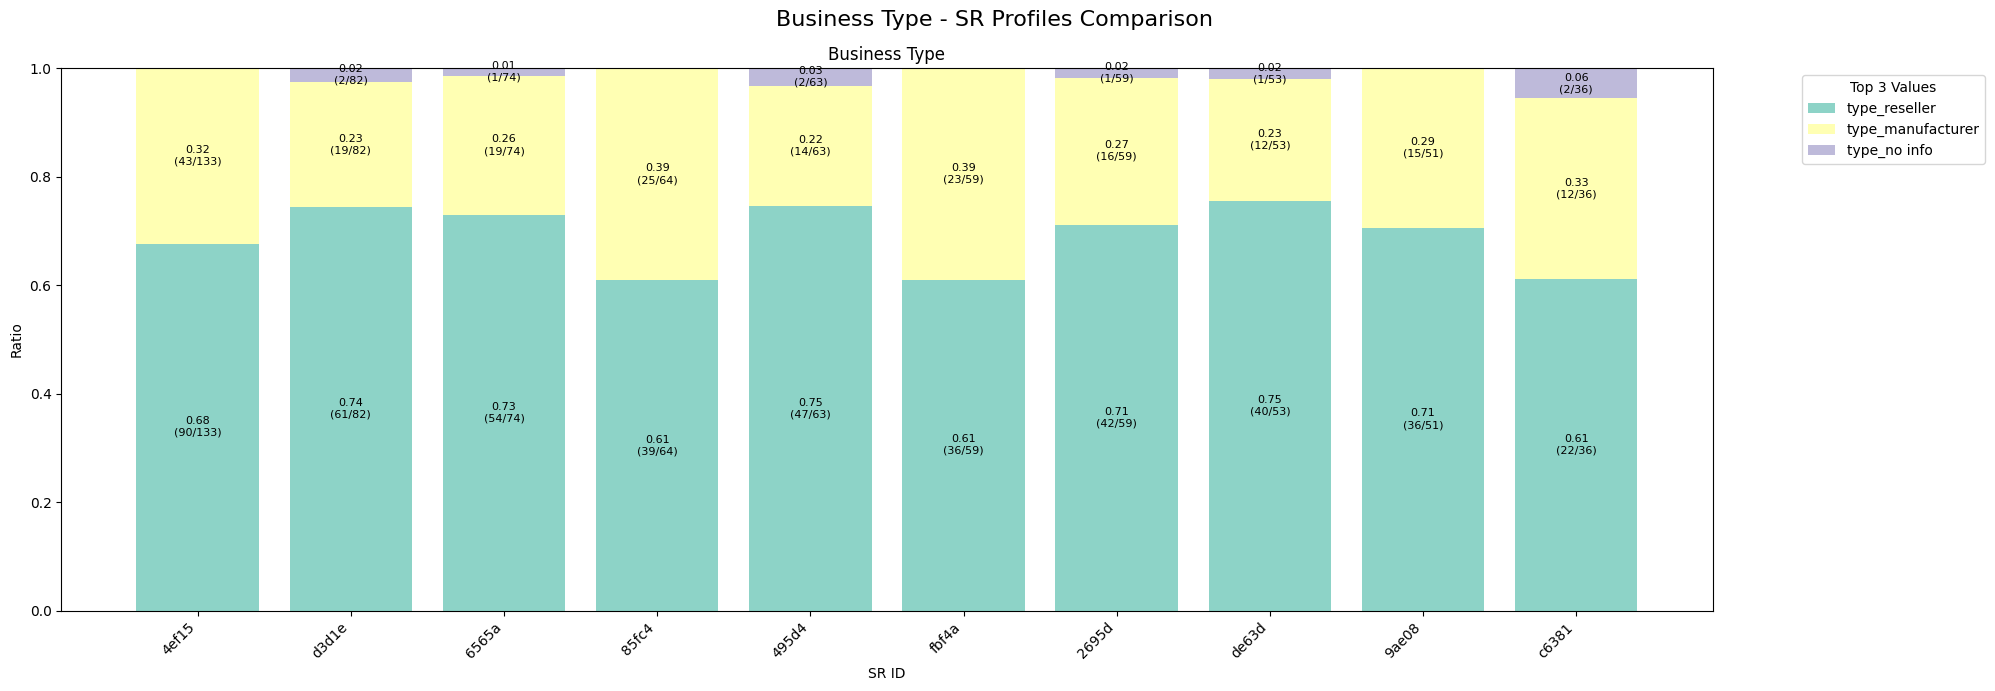

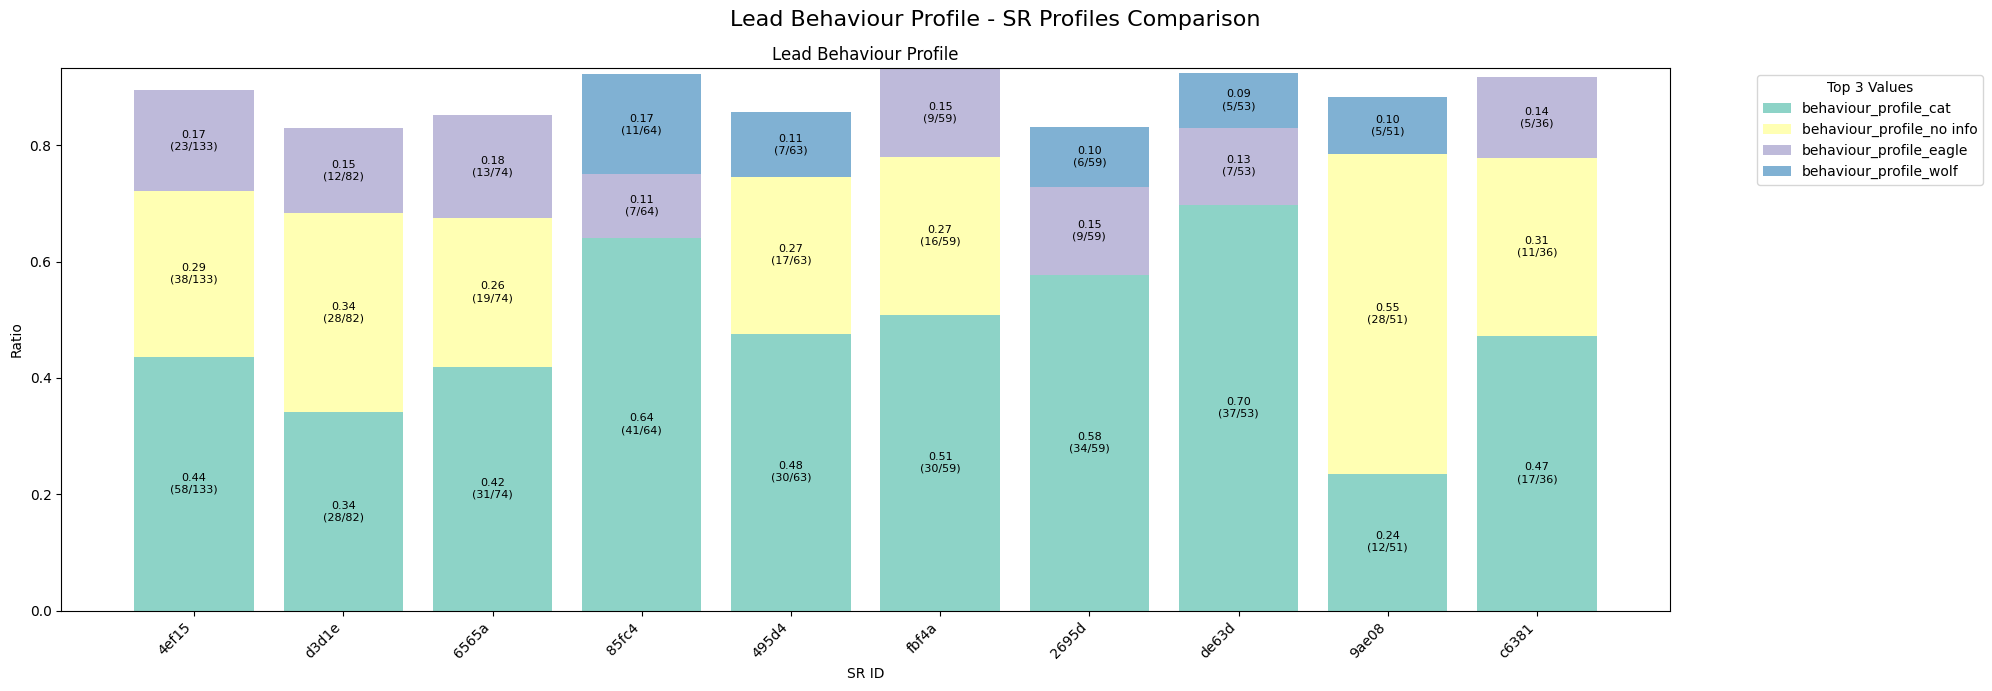

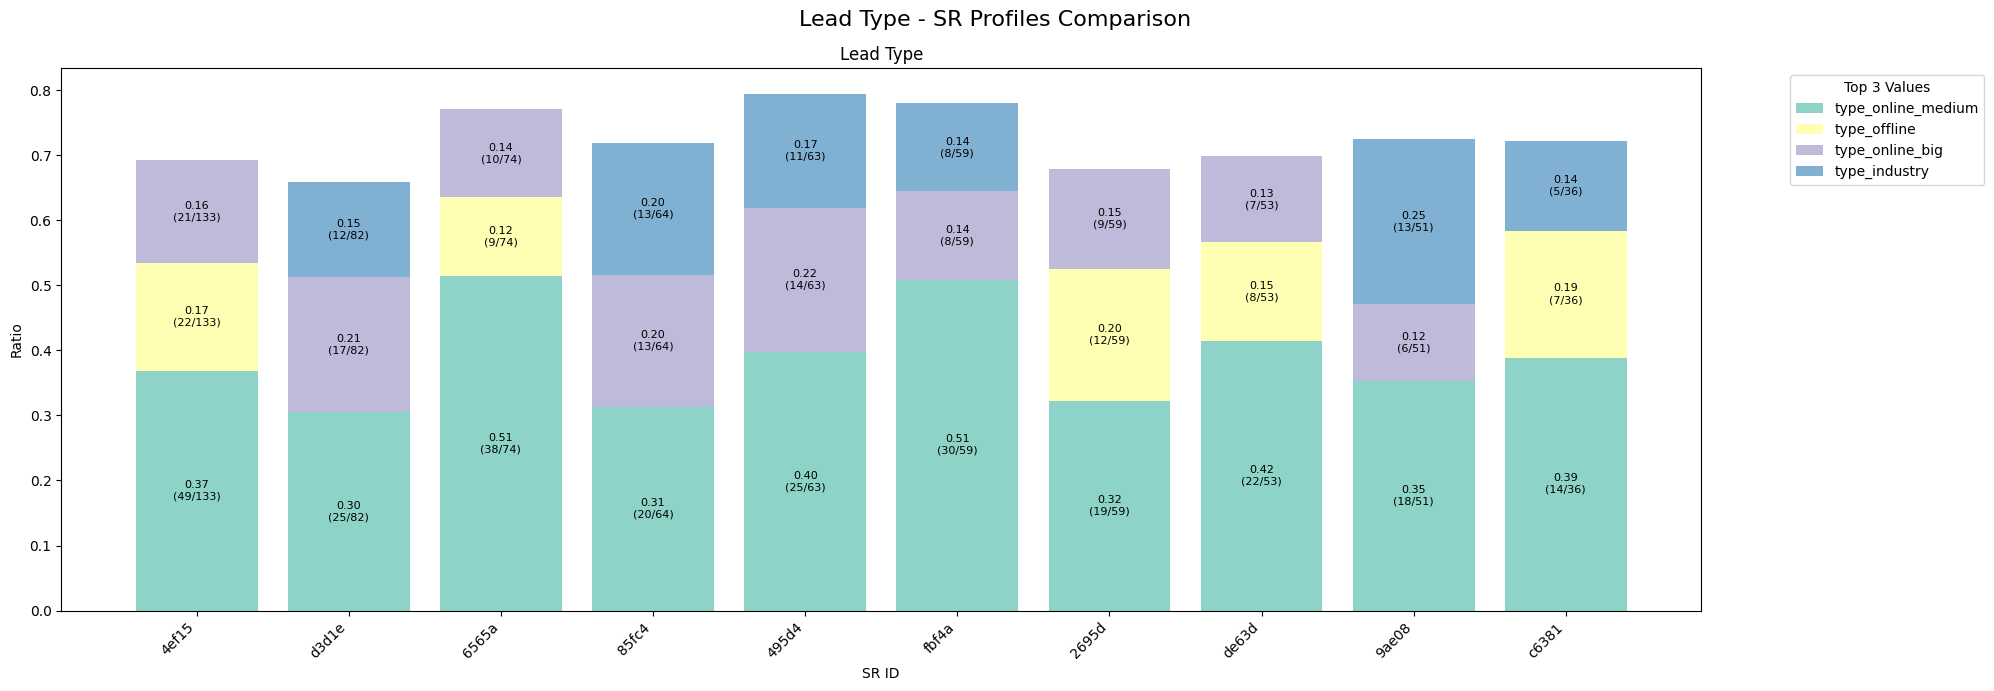

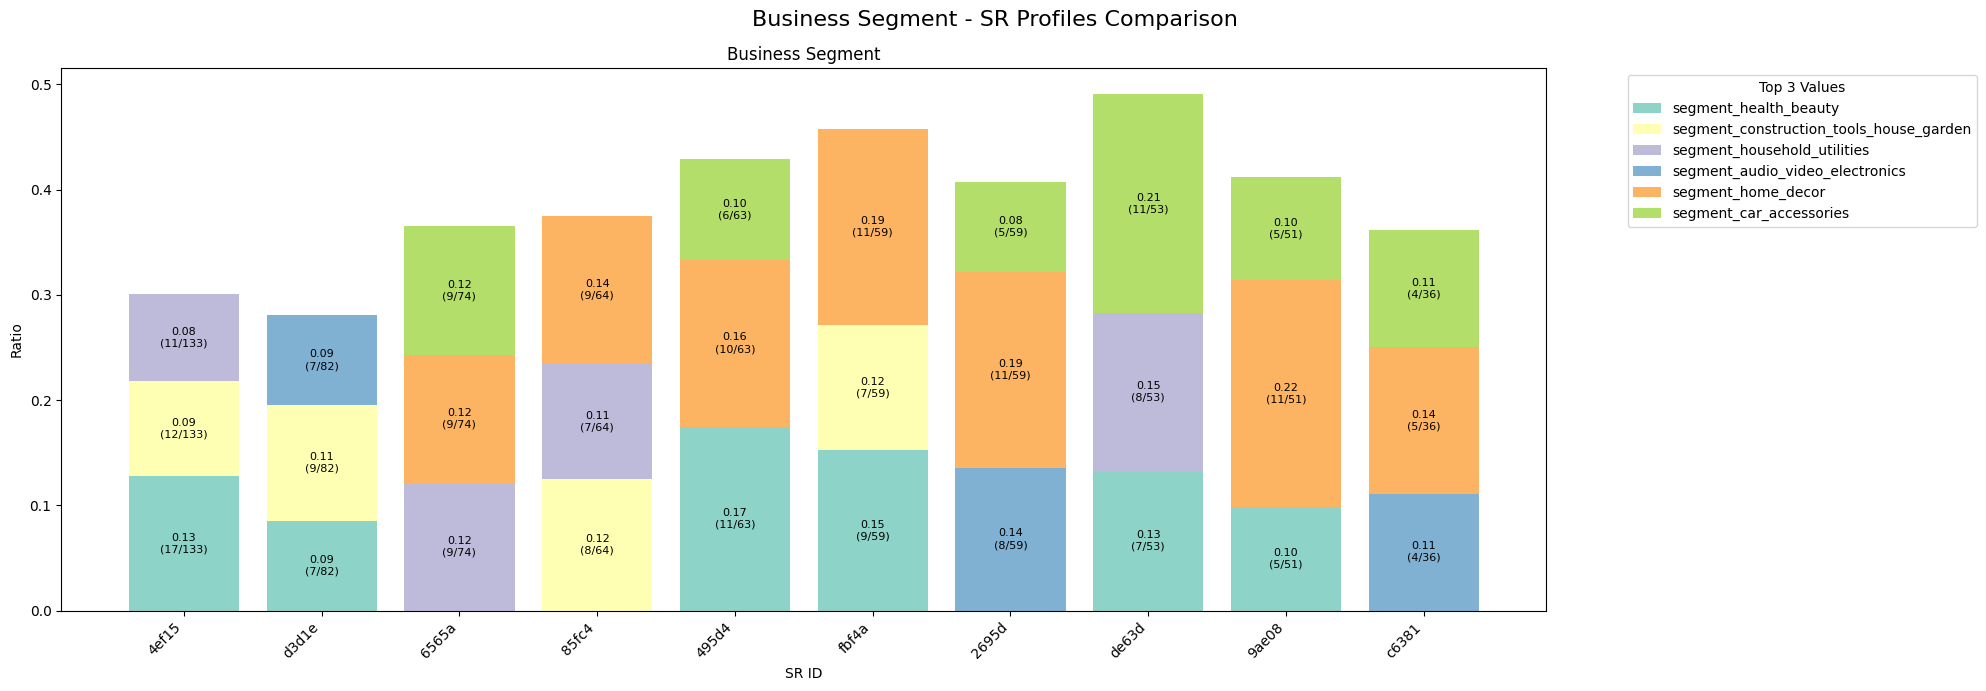

In [ ]:
def visualize_sr_profiles_stacked_bar(data, counts):
    categories = ['business_type', 'lead_behaviour_profile', 'lead_type', 'business_segment']
    num_srs = len(data)

    colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, 10))

    for category in categories:
        fig, ax = plt.subplots(figsize=(20, 7))
        fig.suptitle(f'{category.replace("_", " ").title()} - SR Profiles Comparison', fontsize=16)

        category_cols = [col for col in data.columns if col.startswith(category)]
        category_data = data[category_cols]

        bottom = np.zeros(num_srs)
        for j, col in enumerate(category_cols):
            bars = ax.bar(data.index, category_data[col], bottom=bottom, label=col.split('_', 1)[1], color=colors[j])

            for k, bar in enumerate(bars):
                height = bar.get_height()
                if height > 0:
                    sr_id = data.index[k]
                    count, total = counts[sr_id][col]
                    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                            f'{height:.2f}\n({count}/{total})', ha='center', va='center', fontsize=8)

            bottom += category_data[col]

        ax.set_title(f'{category.replace("_", " ").title()}', fontsize=12)
        ax.set_ylabel('Ratio')
        ax.legend(title='Top 3 Values', bbox_to_anchor=(1.05, 1), loc='upper left')


        shortened_sr_ids = [str(sr_id)[:5] for sr_id in data.index]
        ax.set_xticklabels(shortened_sr_ids, rotation=45, ha='right')
        ax.set_xlabel('SR ID')

        plt.tight_layout()
        plt.show()

# SR 판매자 수 계산 및 상위 10개 SR ID 선택
sr_seller_count = df_merged.groupby('sr_id')['seller_id'].nunique().sort_values(ascending=False)
top_10_sr_ids = sr_seller_count.head(10).index


stacked_bar_data, counts_data = generate_data_for_stacked_bar(df_merged, top_10_sr_ids)
visualize_sr_profiles_stacked_bar(stacked_bar_data, counts_data)


#### 2.6 거래속도

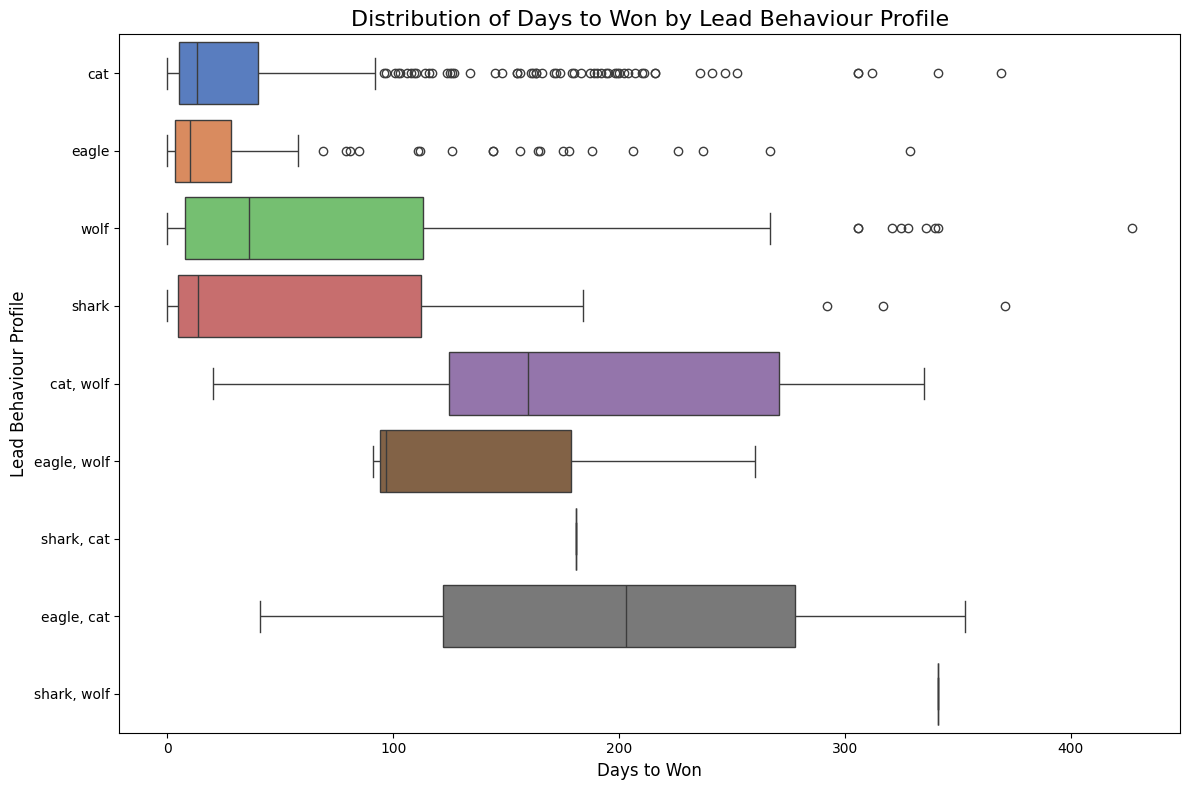

In [ ]:

df_closed['won_date'] = pd.to_datetime(df_closed['won_date'])
df_mql['first_contact_date'] = pd.to_datetime(df_mql['first_contact_date'])

sh_merged = pd.merge(df_closed[['mql_id', 'won_date', 'lead_behaviour_profile']], df_mql[['mql_id', 'first_contact_date']], on='mql_id', how='left')

sh_merged['days_to_won'] = (sh_merged['won_date'] - sh_merged['first_contact_date']).dt.days

# first_contact_date가 won_date보다 늦은 경우 제거
sh_merged = sh_merged[sh_merged['days_to_won'] >= 0].reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.boxplot(x='days_to_won', y='lead_behaviour_profile', data=sh_merged, palette="muted")


plt.title('Distribution of Days to Won by Lead Behaviour Profile', fontsize=16)
plt.xlabel('Days to Won', fontsize=12)
plt.ylabel('Lead Behaviour Profile', fontsize=12)

plt.tight_layout()

plt.show()

# 단일 프로필 (cat, eagle, wolf, shark)

# D (지배성) - 상어 (Shark)
# 상어형 셀러는 목표 달성에 강한 의지를 보이며, 빠르고 결정적인 행동 스타일을 가지고 있습니다.
# 플랫폼 가입과 판매자 등록 과정에서 적극적이고 도전적인 태도를 보입니다.
# 박스 플롯에서 shark 유형은 비교적 짧은 시간 안에 판매자 등록을 완료하는 경향을 보입니다.
# 이는 이들이 결단력 있고 직접적인 접근 방식을 사용하기 때문입니다.
# 그러나 분포를 보면, 일부 상어형 셀러는 등록 과정을 완료하는 데 다소 시간이 걸리는 경우도 있습니다.

# I (영향력) - 독수리 (Eagle)
#독수리형 셀러는 뛰어난 의사소통 능력과 열정을 가지고 있으며, 플랫폼에 빠르게 적응하고 판매자 등록 기회를 포착합니다.
# 그들의 낙관적이고 열정적인 성격은 등록 과정에서 발생할 수 있는 장애물을 극복하는 데 효과적입니다.
# eagle 유형의 셀러는 빠르게 판매자 등록을 완료하는 경향이 강하며, 이는 새로운 기회를 포착하고 이를 빠르게 실행에 옮기는 능력이 데이터를 통해 입증됩니다.
# 중앙값이 0에 가까운 것은 이들이 매우 빠르게 등록 과정을 완료한다는 것을 의미합니다.

# S (안정성) - 고양이 (Cat)
# 고양이형 셀러는 안정적이고 일관된 접근 방식을 선호하며, 플랫폼의 요구사항을 주의 깊게 검토하고 준수합니다.
# 이들은 장기적인 성공을 위해 철저한 준비를 선호하며, 빠른 등록보다는 정확한 등록을 중요시합니다.
# cat 유형의 셀러는 대체로 적절한 시간 안에 판매자 등록을 완료하는 경향이 있지만, 이들의 성격적 특성상 모든 세부사항을 꼼꼼히 확인하고 준비하는 데 중점을 둡니다.
# 이러한 점은 등록 과정에서 상대적으로 짧은 기간 안에 필요한 모든 요구사항을 충족시키는 결과로 이어집니다.
# 그러나 꼬리가 약간 긴 것을 보면 일부 등록 과정에서는 시간이 더 걸릴 수 있습니다.
# 이는 고양이형 셀러가 플랫폼의 정책과 절차를 신중하게 검토하고 준비하는 과정에서 발생한 것으로 추측됩니다.

# C (성실성) - 늑대 (Wolf)
# 늑대형 셀러는 분석적이고 체계적인 접근 방식을 취하며, 플랫폼의 요구사항과 정책을 철저히 연구합니다.
# 이들은 깊이 있는 이해와 완벽한 준비를 바탕으로 판매자 등록을 진행하며, 모든 세부 사항에 신경을 많이 씁니다.
# wolf 유형의 셀러는 분포가 넓게 퍼져 있지 않고, 중간 정도의 기간 안에 판매자 등록이 완료된 것을 볼 수 있습니다.
# 이는 이들이 철저한 분석과 체계적인 준비를 통해 모든 등록 요구사항을 정확히 충족시키는 방식에 기인합니다.
# 늑대형 셀러는 대체로 신중하고 논리적인 접근을 통해 등록 과정을 완료하는 경향이 있으며, 이는 모든 세부사항을 철저히 검토하고 준비하는 데 시간이 걸릴 수 있음을 시사합니다.
# 그러나 이러한 철저한 준비는 향후 판매 활동에서 큰 장점이 될 수 있습니다.

# 복합 프로필 (cat, wolf, eagle, wolf, shark, cat, eagle, cat, shark, wolf)

# 복합 성격 프로필을 가진 셀러들은 확고한 성격적 기반이 없기 때문에, 상호작용에서 비효율적일 수 있으며, 거래 성사 속도가 단일 성격 유형에 비해 훨씬 느립니다.
# 이들은 자신만의 명확한 방식이나 전략이 없어, 상황에 따라 다양한 방식을 시도하면서 거래가 지연되기 쉽습니다.
# 결과적으로, 복합 성격 유형은 거래 성사 시간을 예측하기 어렵고, 일관된 성과를 내기 어렵다는 단점이 있습니다.
# 그래프에서 나타난 것처럼, 복합 성격 프로필을 가진 셀러들은 거래 성사까지 걸리는 시간이 크게 변동하며, 일부는 극단적으로 오래 걸리는 경우도 있습니다.
# 이는 복합적인 성격이 오히려 명확한 목표와 방향성을 잃게 만들어 결과적으로 거래 성사까지 시간이 오래 걸리게 만드는 요인이 됩니다.

#### 2.7 전환 판매자의 특성 분석(거래 성사 시간, 성격)

In [ ]:
df_merged.head()

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,won_month,won_day,time_to_convert,time_to_convert_group
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2018-02,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,2018-02,2018-02-26,5,Expedited Deals
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,2018-04,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0,2018-05,2018-05-08,34,Prolonged Deals
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,2018-04,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,2018-06,2018-06-05,63,Extended Negotiations
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,2018-01,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,no info,reseller,0.0,2018-01,2018-01-17,3,Expedited Deals
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,2017-10,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,2018-07,2018-07-03,267,Extended Negotiations


In [ ]:

# 판매자 특성과 계약 시간과의 관계
# 전체적으로 전환된 판매자의 특성 파악 -> 이러한 특성을 가진 잠재 리드를 타게팅
# 리드 타입의 온라인/오프라인 구분
# 판매자로 성공적으로 전환되는 리드의 공통


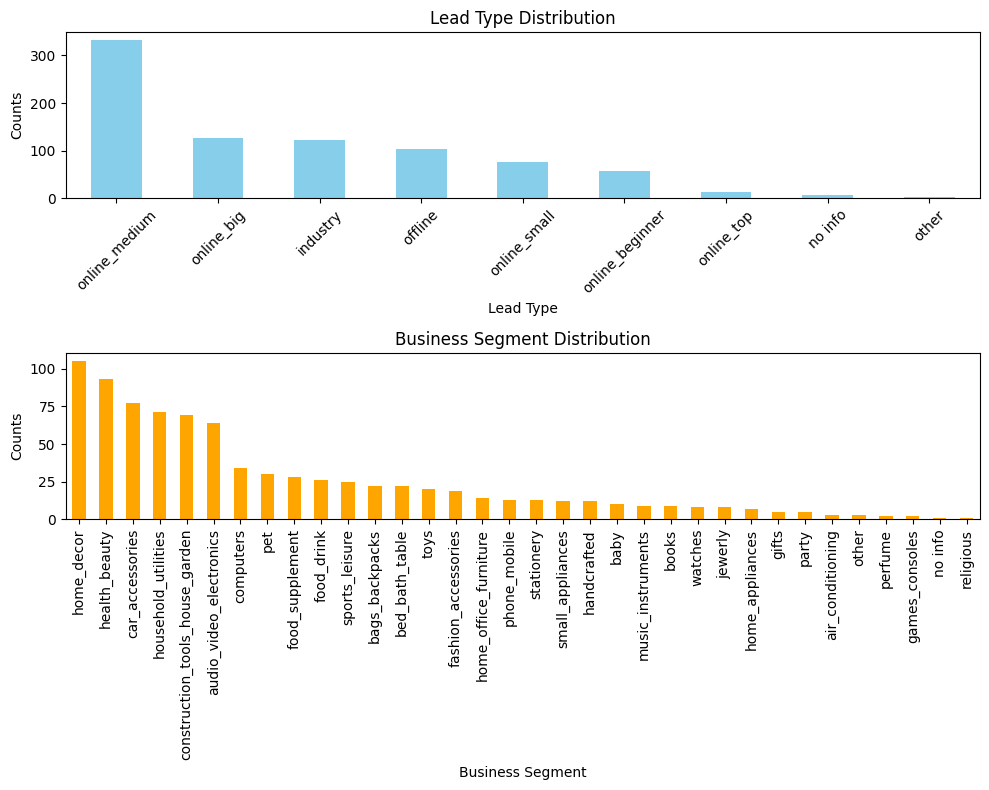

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))


df_merged['lead_type'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Lead Type Distribution')
axs[0].set_ylabel('Counts')
axs[0].set_xlabel('Lead Type')
axs[0].tick_params(axis='x', rotation=45)


df_merged['business_segment'].value_counts().plot.bar(ax=axs[1], color='orange')
axs[1].set_title('Business Segment Distribution')
axs[1].set_ylabel('Counts')
axs[1].set_xlabel('Business Segment')


plt.tight_layout()
plt.show()

In [ ]:
filtered_business_type = df_merged['business_type'].value_counts()
filtered_business_type = filtered_business_type[filtered_business_type > 10]

filtered_lead_behaviour_profile = df_merged['lead_behaviour_profile'].value_counts()
filtered_lead_behaviour_profile = filtered_lead_behaviour_profile[filtered_lead_behaviour_profile > 10]

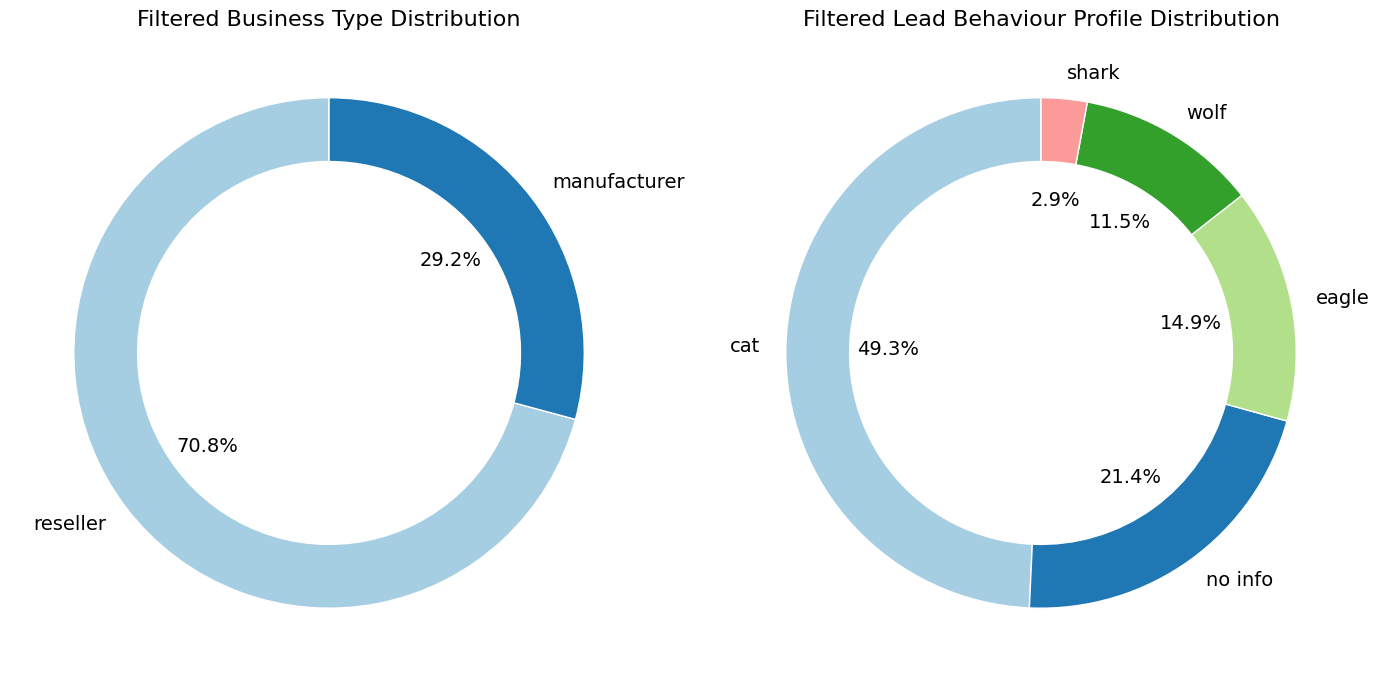

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

wedge_props = {'width': 0.25, 'edgecolor': 'white', 'linewidth': 1}
font_size = 14

axs[0].pie(filtered_business_type, labels=filtered_business_type.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops=wedge_props, textprops={'fontsize': font_size})
axs[0].set_title('Filtered Business Type Distribution', fontsize=font_size + 2)

axs[1].pie(filtered_lead_behaviour_profile, labels=filtered_lead_behaviour_profile.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops=wedge_props, textprops={'fontsize': font_size})
axs[1].set_title('Filtered Lead Behaviour Profile Distribution', fontsize=font_size + 2)

plt.tight_layout()
plt.show()


In [ ]:
lead_btype=df_merged.groupby(['lead_type','business_type']).size().unstack().reset_index().fillna(0)
lead_btype

business_type,lead_type,manufacturer,no info,other,reseller
0,industry,69.0,3.0,0.0,51.0
1,no info,0.0,0.0,0.0,6.0
2,offline,21.0,2.0,0.0,81.0
3,online_beginner,18.0,0.0,0.0,39.0
4,online_big,23.0,0.0,0.0,103.0
5,online_medium,79.0,5.0,0.0,248.0
6,online_small,28.0,0.0,0.0,49.0
7,online_top,4.0,0.0,0.0,10.0
8,other,0.0,0.0,3.0,0.0


<Figure size 1200x800 with 0 Axes>

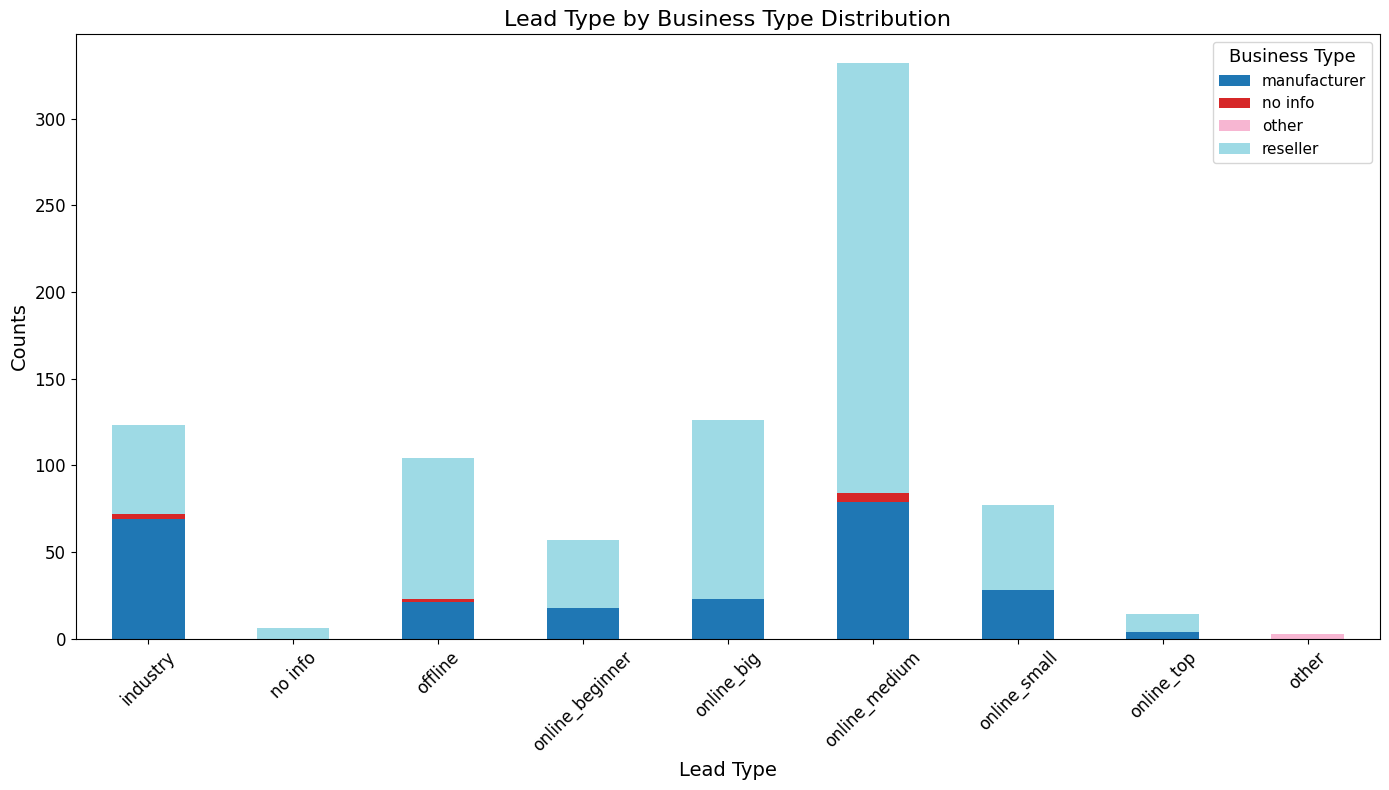

In [ ]:
plt.figure(figsize=(12, 8))
lead_btype.set_index('lead_type').plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))

plt.title('Lead Type by Business Type Distribution', fontsize=16)
plt.xlabel('Lead Type', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Business Type', title_fontsize=13, fontsize=11)
plt.tight_layout()
plt.show()

# industry type을 가지는 판매자인 경우, 제조업자의 비율이 더 높게 나왔다.
# 그 외의 다른 lead_type인 경우 모드 소매업자의 비율이 제조업자의 비율보다 높게 나왔다.
# olist와 계약을 하여 입점을 하려는 lead는 앞서 살펴본 것처럼 소매업자가 많다.

In [ ]:
df_merged.columns

Index(['mql_id', 'first_contact_date', 'landing_page_id', 'origin',
       'first_contact_month', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'business_type', 'declared_monthly_revenue', 'won_month', 'won_day',
       'time_to_convert', 'time_to_convert_group'],
      dtype='object')

In [ ]:
time_behav=df_merged.groupby(['time_to_convert_group','lead_behaviour_profile']).size().unstack()
time_behav=time_behav.drop(['eagle, wolf','shark, wolf','eagle, cat','cat, wolf','shark, cat'],axis=1)
time_behav

lead_behaviour_profile,cat,eagle,no info,shark,wolf
time_to_convert_group,,,,,
Expedited Deals,127,50,44,9,21
Quick Deals,72,19,40,2,11
Standard Deals,62,17,32,2,13
Prolonged Deals,46,9,24,2,10
Extended Negotiations,80,20,34,8,39


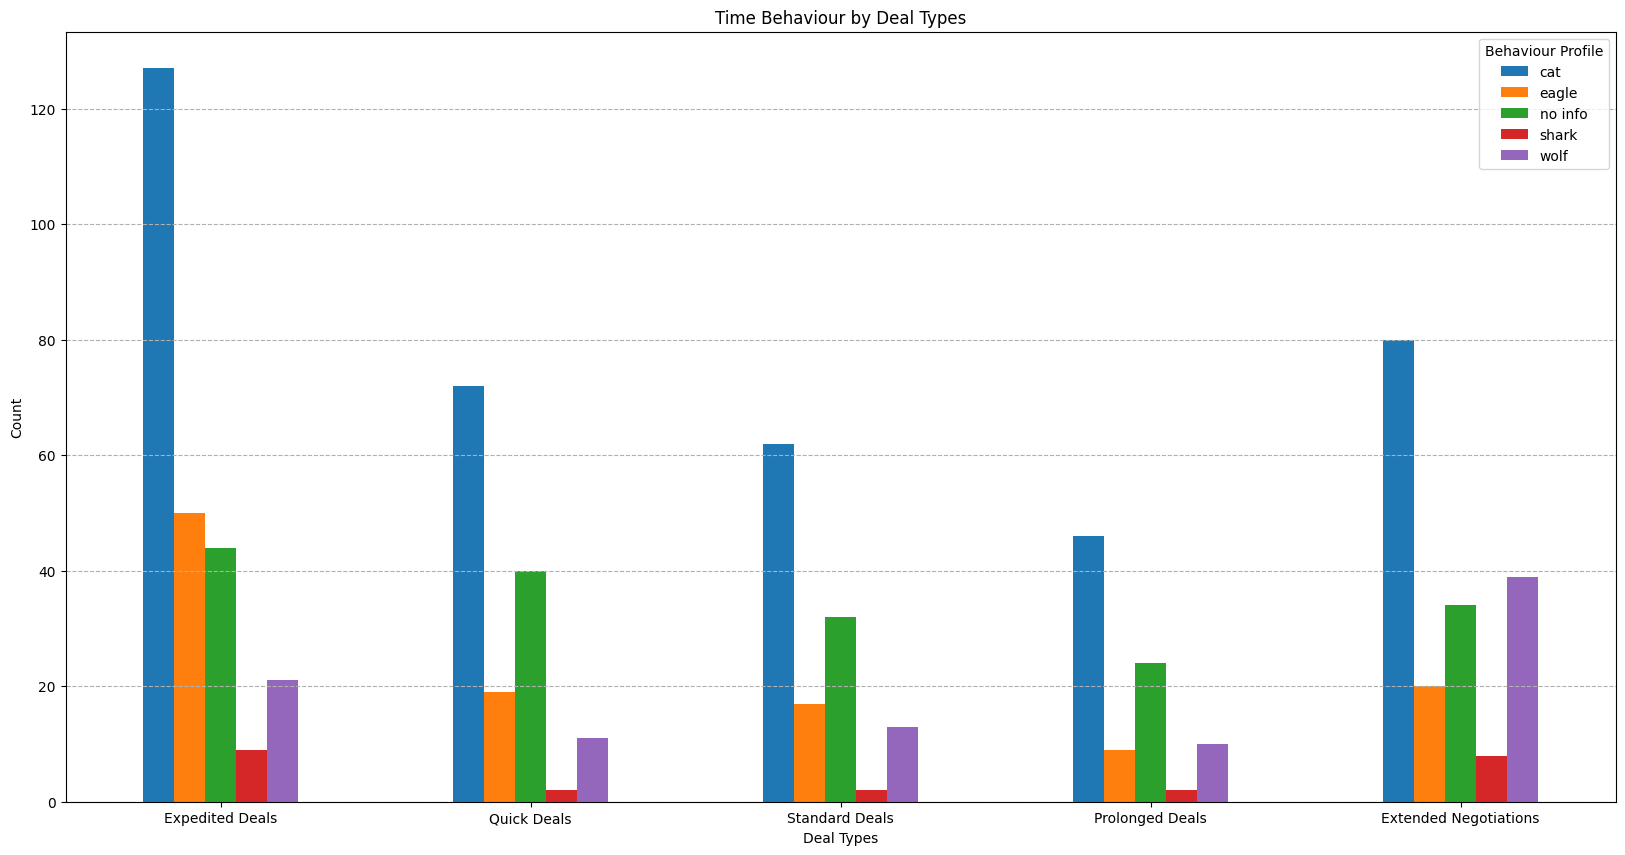

In [ ]:
# lead 프로파일 별 거래 시간에 의한 그룹 비교

plt.figure(figsize=(20,10))
time_behav.plot(kind='bar', ax=plt.gca())

plt.title('Time Behaviour by Deal Types')
plt.xlabel('Deal Types')
plt.ylabel('Count')
plt.legend(title='Behaviour Profile')
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--')
plt.show()


# Cat 프로파일은 빠르고 단기적인 거래에서 강세를 보이며, 거래가 지연될수록 비율이 감소하다가 장기 협상에서 다시 증가하는 패턴을 보인다
# Eagle 프로파일은 가장 빠른 거래 집단에서 2위를 차지하고, 나머지 그룹에서 3위이하 인것으로 보아, 빠른 결정을 하는 경우가 비교적 많다.
# Wolf 프로파일은 거래가 지연되거나 장기화될수록 그 비율이 증가하는데, 단기적이고 공격적인 협상보다 장기적 협상이 중요할 것으로 보임
# Shark 프로파일은 모든 거래 유형에서 매우 적은 비율을 차지, 빠른 시일 내에 결정하기도 하며, 장기적 협상을 하는 경우하는 비율과 비슷하다.

# 결론:
# 고객들의 행동 패턴(성격)이 거래의 속도와 협상의 장기성에 따라 달라질 수 있다.

# Cat과 Eagle 프로파일은 빠른 거래에서 두드러지며, cat은 장기 협상에서도 중요한 역할
# Wolf 프로파일은 주로 장기 협상에서 강세를 보이며, Shark 프로파일은 소수지만 특정 상황에서 영향력을 발휘

In [ ]:
origin_time=df_merged.groupby(['origin','time_to_convert_group']).size().unstack().fillna(0)
origin_time=origin_time.drop(['other','unknown','other_publicities'])
origin_time

time_to_convert_group,Expedited Deals,Quick Deals,Standard Deals,Prolonged Deals,Extended Negotiations
origin,,,,,
direct_traffic,20,13,5,7,8
display,2,1,2,0,0
email,3,3,4,1,4
organic_search,76,50,40,29,66
paid_search,57,30,31,15,55
referral,5,4,3,5,4
social,16,6,17,11,25


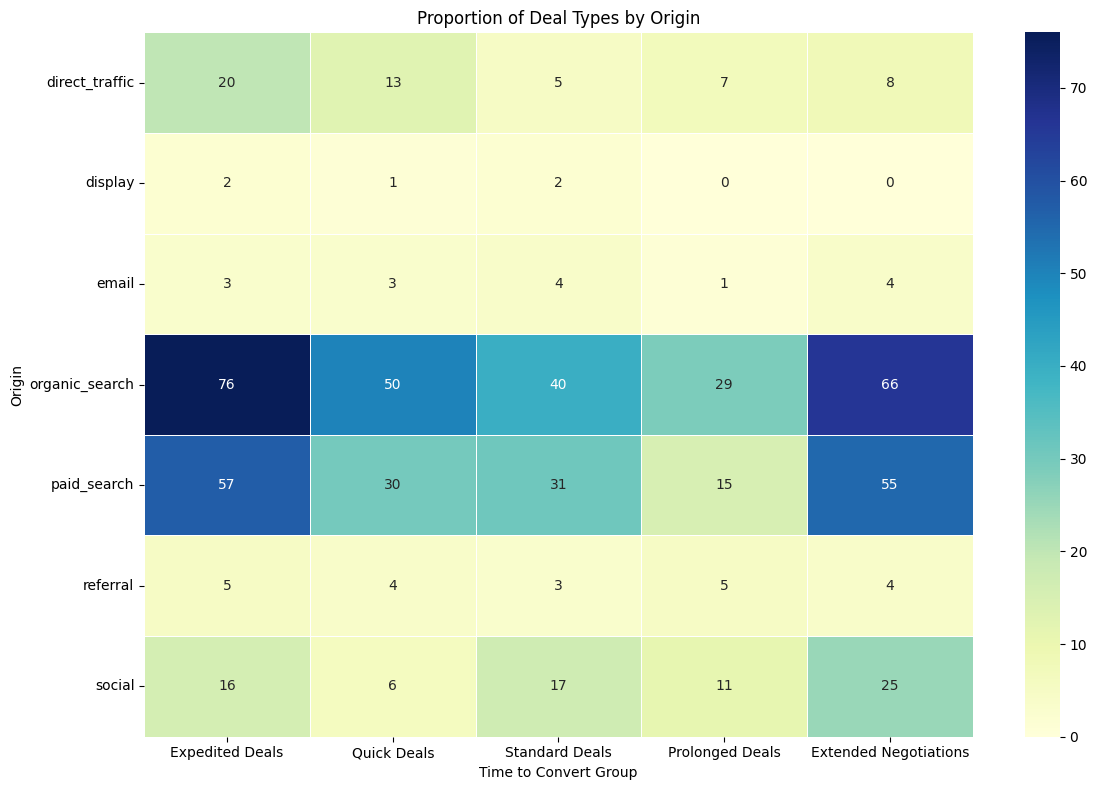

In [ ]:
# 유입 채널 별 거래 시간에 의한 그룹 비교

# origin_time = origin_time.div(origin_time.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(origin_time, annot=True, cmap='YlGnBu', linewidths=0.5)

plt.title('Proportion of Deal Types by Origin')
plt.xlabel('Time to Convert Group')
plt.ylabel('Origin')
plt.tight_layout()

plt.show()
# 색깔 변경 필요

# direct_traffic: 직접 트래픽으로 유입된 고객 중 가장 많은 수가 빠른 거래를 완료되고, 대체적으로 거래 성사 시간이 빠르다. 적극성(url 직접 검색 등)
# display: 디스플레이 광고는 전부 한 달이 내 거래를 성사시킨다.
# paid search: 7일 이내 거래 성사와 60일 이후 거래 성사의 수가 비슷하게 나타난다.
# organic_search: 가장 많은 전환을 발생시키며, 유입된 lead는 대체적으로 빠른시간내에 판매자로 전환된다. 다만 60일 이상 전환에 시간이 걸린경우도 66명 정도 있다.
## 즉각적인 구매와 장기적인 의사결정을 모두 지원할 수 있는 균형 잡힌 방법을 고려해야 한다.

# referral과 social의 경우 거래 성사까지 비교적 시간이 걸림

# Extended Negotiations는 소셜 미디어와 유료 검색에서 비교적 높은 비율을 차지, 유입된 고객들이 장기적인 협상을 선호할 가능성 크다.

# 매체별 시간적 차이는 성격과 관련이 있을까?

# 결론
# 마케팅 전략은 각 유입 경로의 특성을 고려해 최적화될 필요가 있다

# 즉각적인 성과를 원한다면 Direct Traffic과 Display 광고에 집중, 신중한 의사결정 과정이 필요한 고객층을 겨냥하려면 Email, Paid Search, Organic Search를 활용하는 것이 효과적
# Referral과 Social을 통해 유입된 고객들은 장기적인 관계 구축과 협상에 적합한 전략이 필요할 것
# 추천의 경우 적절한 보상을 주어야지, 거래 성사시간이 빨라 질 것 같다.

In [ ]:
origin_time

time_to_convert_group,Expedited Deals,Quick Deals,Standard Deals,Prolonged Deals,Extended Negotiations
origin,,,,,
direct_traffic,20,13,5,7,8
display,2,1,2,0,0
email,3,3,4,1,4
organic_search,76,50,40,29,66
paid_search,57,30,31,15,55
referral,5,4,3,5,4
social,16,6,17,11,25


In [ ]:
origin_behav=df_merged.groupby(['origin','lead_behaviour_profile']).size().unstack().fillna(0).astype(int)
origin_behav=origin_behav.drop(['eagle, wolf','shark, wolf','eagle, cat','cat, wolf','shark, cat','no info'],axis=1)
origin_behav=origin_behav.drop(['other','unknown','other_publicities'])

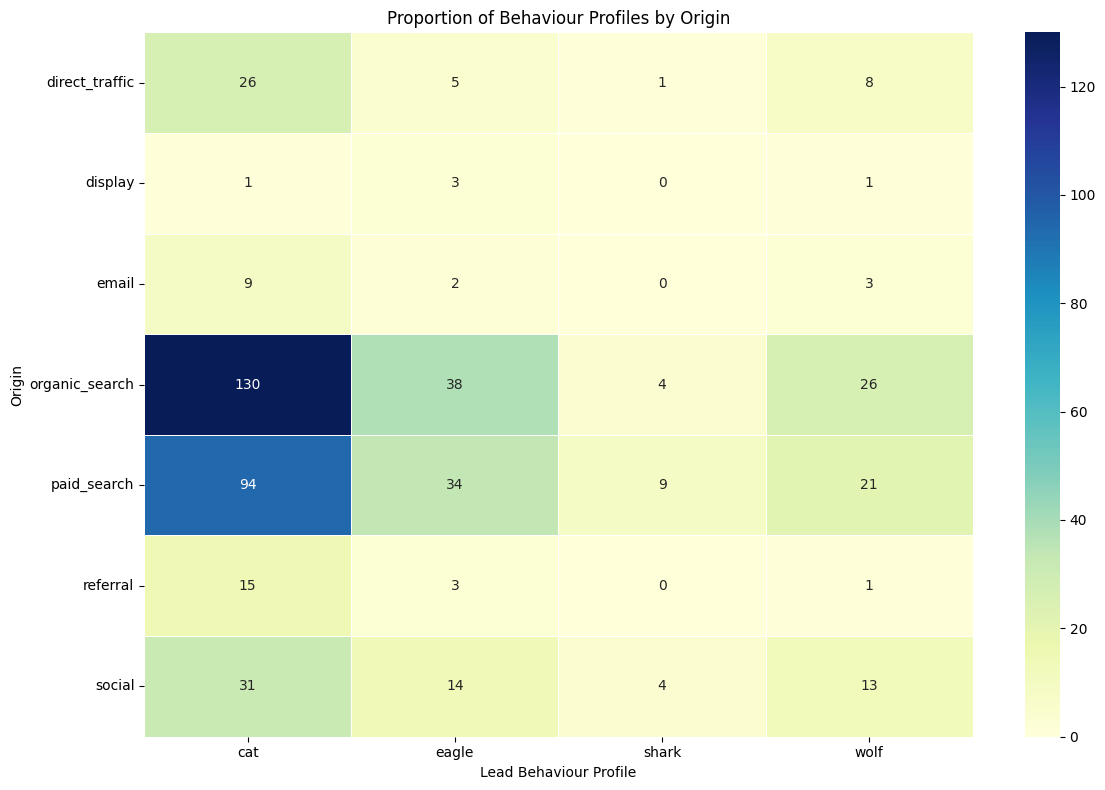

In [ ]:
# origin_behav_ratio = origin_behav.div(origin_behav.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(origin_behav, annot=True, fmt="d", cmap='YlGnBu', linewidths=0.5)

plt.title('Proportion of Behaviour Profiles by Origin')
plt.xlabel('Lead Behaviour Profile')
plt.ylabel('Origin')
plt.tight_layout()

plt.show()

# organic search: 모든 성격 유형에서 organic search 주요 유입 경로로 나타났다.
# 특히 cat 유형에서 유입이 가장 많았으며, eagle과 wolf 유형에서도 높은 비중을 차지
# paid search: cat과 wolf 유형에서 paid search가 두드러진 유입 경로로 나타남, shark 유형에서도 paid search 높은 비중 차지
# scocial: wolf와 eagle 유형에서 Social Media를 통한 유입이 상대적으로 높게 나타남
# direct traffic: cat 유형에서 Direct traffic이 높은 비중을 차지, wolf도 전체 비중 중에선 20% 비중 차지 (8/40)

# 결론
# 성격에 따른 선호하는 채널은 다르게 나타나며, 이에 맞춰 전략 제시가 필요하다.

# organic search는 모든 성격 유형에서 주요 유입 경로로, 특히 cat 유형에서 가장 많다. SEO 최적화가 중요
# paid search는 cat과 wolf 유형에서 효과적이며, shark 유형에서도 유효하므로 유료 광고에 대한 투자가 필요
# social media는 wolf와 eagle 유형에게 중요한 유입 채널로, 소셜 미디어 마케팅을 강화
# direct traffic은 cat과 wolf 유형에서 높게 나타나며, 충성도 프로그램과 개인화 전략이 중요

In [ ]:
df_merged.to_csv('closed_cleaned.csv',index=False)